In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [55]:
warnings.filterwarnings(action = 'ignore')

# 데이터셋 원본 로드 및 전처리

## 데이터셋 10000개씩 df_list에 담기

In [72]:
# 데이터셋의 크기가 크므로 10000개씩 불러와서 df_list에 담기
# 10000개마다 진행상황 표시
df_list = []

for chk, df in enumerate(pd.read_csv("C:/Users/whileduck/Desktop/2019-Nov.csv",chunksize = 10000)):
    
    df_list.append(df)
    
    if chk % 1000 ==0 :
        
        print(chk, '번째 진행중')

0 번째 진행중
1000 번째 진행중
2000 번째 진행중
3000 번째 진행중
4000 번째 진행중
5000 번째 진행중
6000 번째 진행중


In [73]:
# 첫번째 10000개 행 데이터
df_list[0]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
9995,2019-11-01 00:56:00 UTC,view,15100145,2053013557024391671,NaN,lider,345.93,528293100,f6da70f4-0597-47c0-a49e-f92601d2653a
9996,2019-11-01 00:56:00 UTC,view,3600545,2053013563810775923,appliances.kitchen.washer,samsung,579.14,566205335,a426ed82-316b-4eb3-b744-a69ef2cb0121
9997,2019-11-01 00:56:00 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,566286942,5b6eec5e-24e2-49f6-b57e-a7ff28fa4842
9998,2019-11-01 00:56:00 UTC,view,17200399,2053013559792632471,furniture.living_room.sofa,NaN,507.07,512797937,39b19a6e-6acf-4ba9-8c86-5d8a8ba2f980


In [74]:
# 대분류, 소분류 나눠주기 위해 'category_code' 컬럼 확인
df['category_code']

67500000              electronics.smartphone
67500001                  electronics.clocks
67500002                                 NaN
67500003                  electronics.tablet
67500004                                 NaN
                          ...               
67501974                                 NaN
67501975                       apparel.shoes
67501976              electronics.smartphone
67501977    appliances.kitchen.refrigerators
67501978              electronics.smartphone
Name: category_code, Length: 1979, dtype: object

## DF 만들어주는 함수 생성
"""함수내용
* 결측치 제거
* 대분류, 소분류의 파생변수 생성
* 대분류에서 의류('apparel')만 가져오기
"""

In [75]:
def data_frame_maker(df):
    # 카테고리 코드의 결측치 제거하고 df 재생성
    df = df[df['category_code'].notnull()]
    
    # 대분류,소분류 파생변수 생성
    df['대분류'] = df['category_code'].map(lambda x : x.split('.')[0])
    df['소분류'] = df['category_code'].map(lambda x : x.split('.')[1])
    
    # 대분류에서 의류('apparel')만 가져오기
    df = df[df['대분류'] == 'apparel']
    
    return df

## 10000개씩 가져온 DF에 함수 적용

In [76]:
data_list = []

for i in range(len(df_list)):
    #결측치 제거, 대분류/소분류 생성, 의류항목만 가져오는 함수에 가져온 df_list들 넣어주기
    data_list.append(data_frame_maker(df_list[i]))
    
    if i % 1000 == 0:
        print(i, '번째 진행중')

0 번째 진행중
1000 번째 진행중
2000 번째 진행중
3000 번째 진행중
4000 번째 진행중
5000 번째 진행중
6000 번째 진행중


## 전처리한 함수들 Concat

In [77]:
df = pd.concat(data_list).drop(['category_id','user_session'], axis=1)
df

,event_time,event_type,product_id,category_code,brand,price,user_id,대분류,소분류
52,2019-11-01 00:00:17 UTC,view,43200121,apparel.tshirt,goodloot,8.73,566175330,apparel,tshirt
53,2019-11-01 00:00:18 UTC,view,44300043,apparel.jeans,NaN,40.16,545220871,apparel,jeans
92,2019-11-01 00:00:35 UTC,view,44300009,apparel.jeans,NaN,50.45,545220871,apparel,jeans
117,2019-11-01 00:00:44 UTC,view,44300026,apparel.jeans,NaN,46.08,545220871,apparel,jeans
184,2019-11-01 00:01:12 UTC,view,45601414,apparel.shoes,pablosky,65.38,526996709,apparel,shoes
...,...,...,...,...,...,...,...,...,...
67501871,2019-11-30 23:59:17 UTC,view,28715769,apparel.shoes,nexpero,68.21,574692255,apparel,shoes
67501874,2019-11-30 23:59:18 UTC,view,28718603,apparel.shoes,respect,89.84,553345124,apparel,shoes
67501915,2019-11-30 23:59:36 UTC,view,28715769,apparel.shoes,nexpero,68.21,574692255,apparel,shoes
67501942,2019-11-30 23:59:44 UTC,view,28719425,apparel.shoes,baden,62.81,545223467,apparel,shoes


## 'hour' 파생변수 생성

In [78]:
df['hour'] = df['event_time'].map(lambda x : int(x[11:13]))
df

,event_time,event_type,product_id,category_code,brand,price,user_id,대분류,소분류,hour
52,2019-11-01 00:00:17 UTC,view,43200121,apparel.tshirt,goodloot,8.73,566175330,apparel,tshirt,0
53,2019-11-01 00:00:18 UTC,view,44300043,apparel.jeans,NaN,40.16,545220871,apparel,jeans,0
92,2019-11-01 00:00:35 UTC,view,44300009,apparel.jeans,NaN,50.45,545220871,apparel,jeans,0
117,2019-11-01 00:00:44 UTC,view,44300026,apparel.jeans,NaN,46.08,545220871,apparel,jeans,0
184,2019-11-01 00:01:12 UTC,view,45601414,apparel.shoes,pablosky,65.38,526996709,apparel,shoes,0
...,...,...,...,...,...,...,...,...,...,...
67501871,2019-11-30 23:59:17 UTC,view,28715769,apparel.shoes,nexpero,68.21,574692255,apparel,shoes,23
67501874,2019-11-30 23:59:18 UTC,view,28718603,apparel.shoes,respect,89.84,553345124,apparel,shoes,23
67501915,2019-11-30 23:59:36 UTC,view,28715769,apparel.shoes,nexpero,68.21,574692255,apparel,shoes,23
67501942,2019-11-30 23:59:44 UTC,view,28719425,apparel.shoes,baden,62.81,545223467,apparel,shoes,23


## 'min' 파생변수 생성

In [79]:
df['min'] = df['event_time'].map(lambda x : int(x[14:16]))
df

,event_time,event_type,product_id,category_code,brand,price,user_id,대분류,소분류,hour,min
52,2019-11-01 00:00:17 UTC,view,43200121,apparel.tshirt,goodloot,8.73,566175330,apparel,tshirt,0,0
53,2019-11-01 00:00:18 UTC,view,44300043,apparel.jeans,NaN,40.16,545220871,apparel,jeans,0,0
92,2019-11-01 00:00:35 UTC,view,44300009,apparel.jeans,NaN,50.45,545220871,apparel,jeans,0,0
117,2019-11-01 00:00:44 UTC,view,44300026,apparel.jeans,NaN,46.08,545220871,apparel,jeans,0,0
184,2019-11-01 00:01:12 UTC,view,45601414,apparel.shoes,pablosky,65.38,526996709,apparel,shoes,0,1
...,...,...,...,...,...,...,...,...,...,...,...
67501871,2019-11-30 23:59:17 UTC,view,28715769,apparel.shoes,nexpero,68.21,574692255,apparel,shoes,23,59
67501874,2019-11-30 23:59:18 UTC,view,28718603,apparel.shoes,respect,89.84,553345124,apparel,shoes,23,59
67501915,2019-11-30 23:59:36 UTC,view,28715769,apparel.shoes,nexpero,68.21,574692255,apparel,shoes,23,59
67501942,2019-11-30 23:59:44 UTC,view,28719425,apparel.shoes,baden,62.81,545223467,apparel,shoes,23,59


## 'DOW(요일명)' 파생변수 생성

In [80]:
df['요일'] = pd.to_datetime(df['event_time'].str[:11]).dt.dayofweek

In [81]:
dayofweek= '0123456'

In [82]:
def find_dayofweek(day_no):
    name = dayofweek[day_no]
    return name

In [83]:
df['DOW'] = df['요일'].map(find_dayofweek)
df

,event_time,event_type,product_id,category_code,brand,price,user_id,대분류,소분류,hour,min,요일,DOW
52,2019-11-01 00:00:17 UTC,view,43200121,apparel.tshirt,goodloot,8.73,566175330,apparel,tshirt,0,0,4,4
53,2019-11-01 00:00:18 UTC,view,44300043,apparel.jeans,NaN,40.16,545220871,apparel,jeans,0,0,4,4
92,2019-11-01 00:00:35 UTC,view,44300009,apparel.jeans,NaN,50.45,545220871,apparel,jeans,0,0,4,4
117,2019-11-01 00:00:44 UTC,view,44300026,apparel.jeans,NaN,46.08,545220871,apparel,jeans,0,0,4,4
184,2019-11-01 00:01:12 UTC,view,45601414,apparel.shoes,pablosky,65.38,526996709,apparel,shoes,0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67501871,2019-11-30 23:59:17 UTC,view,28715769,apparel.shoes,nexpero,68.21,574692255,apparel,shoes,23,59,5,5
67501874,2019-11-30 23:59:18 UTC,view,28718603,apparel.shoes,respect,89.84,553345124,apparel,shoes,23,59,5,5
67501915,2019-11-30 23:59:36 UTC,view,28715769,apparel.shoes,nexpero,68.21,574692255,apparel,shoes,23,59,5,5
67501942,2019-11-30 23:59:44 UTC,view,28719425,apparel.shoes,baden,62.81,545223467,apparel,shoes,23,59,5,5


## 'Weeks' 파생변수 생성

In [84]:
# 2019/11월 
# 1주차 : 1-2일
# 2주차 : 3-9일
# 3주차 : 10-16일
# 4주차 : 17-23일
# 5주차 : 24-30일

In [85]:
df.loc[df['event_time'].str[8:10].isin(['01','02']), 'Weeks'] = '1'
df.loc[df['event_time'].str[8:10].isin(['03','04','05','06','07','08','09']), 'Weeks'] = '2'
df.loc[df['event_time'].str[8:10].isin(['10','11','12','13','14','15','16']), 'Weeks'] = '3'
df.loc[df['event_time'].str[8:10].isin(['17','18','19','20','21','22','23']), 'Weeks'] = '4'
df.loc[df['event_time'].str[8:10].isin(['24','25','26','27','28','29','30']), 'Weeks'] = '5'
df

,event_time,event_type,product_id,category_code,brand,price,user_id,대분류,소분류,hour,min,요일,DOW,Weeks
52,2019-11-01 00:00:17 UTC,view,43200121,apparel.tshirt,goodloot,8.73,566175330,apparel,tshirt,0,0,4,4,1
53,2019-11-01 00:00:18 UTC,view,44300043,apparel.jeans,NaN,40.16,545220871,apparel,jeans,0,0,4,4,1
92,2019-11-01 00:00:35 UTC,view,44300009,apparel.jeans,NaN,50.45,545220871,apparel,jeans,0,0,4,4,1
117,2019-11-01 00:00:44 UTC,view,44300026,apparel.jeans,NaN,46.08,545220871,apparel,jeans,0,0,4,4,1
184,2019-11-01 00:01:12 UTC,view,45601414,apparel.shoes,pablosky,65.38,526996709,apparel,shoes,0,1,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67501871,2019-11-30 23:59:17 UTC,view,28715769,apparel.shoes,nexpero,68.21,574692255,apparel,shoes,23,59,5,5,5
67501874,2019-11-30 23:59:18 UTC,view,28718603,apparel.shoes,respect,89.84,553345124,apparel,shoes,23,59,5,5,5
67501915,2019-11-30 23:59:36 UTC,view,28715769,apparel.shoes,nexpero,68.21,574692255,apparel,shoes,23,59,5,5,5
67501942,2019-11-30 23:59:44 UTC,view,28719425,apparel.shoes,baden,62.81,545223467,apparel,shoes,23,59,5,5,5


In [168]:
df.to_csv('11월_데이터전처리.csv',index = False)
df = pd.read_csv('11월_데이터전처리.csv')

df.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,대분류,소분류,hour,min,요일,DOW,Weeks
0,2019-11-01 00:00:17 UTC,view,43200121,apparel.tshirt,goodloot,8.73,566175330,apparel,tshirt,0,0,4,4,1
1,2019-11-01 00:00:18 UTC,view,44300043,apparel.jeans,NaN,40.16,545220871,apparel,jeans,0,0,4,4,1
2,2019-11-01 00:00:35 UTC,view,44300009,apparel.jeans,NaN,50.45,545220871,apparel,jeans,0,0,4,4,1
3,2019-11-01 00:00:44 UTC,view,44300026,apparel.jeans,NaN,46.08,545220871,apparel,jeans,0,0,4,4,1
4,2019-11-01 00:01:12 UTC,view,45601414,apparel.shoes,pablosky,65.38,526996709,apparel,shoes,0,1,4,4,1


# RFM 파일 로드

In [169]:
rfm = pd.read_csv("C:/Users/whileduck/Downloads/rfm_nov.csv")
rfm

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_class
0,353600697,11,1,88.03,2,4,3,243,9,gold
1,506255779,2,1,77.22,1,4,3,143,8,silver
2,512168831,5,1,127.42,1,4,2,142,7,silver
3,512363886,14,1,25.74,2,4,4,244,10,gold
4,512364888,2,2,93.44,1,1,2,112,4,silver
...,...,...,...,...,...,...,...,...,...,...
7864,579664706,1,1,88.03,1,4,3,143,8,silver
7865,579744564,1,1,79.02,1,4,3,143,8,silver
7866,579828565,1,1,80.83,1,4,3,143,8,silver
7867,579833547,1,1,80.83,1,4,3,143,8,silver


In [239]:
rfm['RFM_class_2'] = rfm['RFM_class'].map({'silver':0,'gold':1,'platinum':2})

Text(0.5, 1.0, '의류 구매 등급 빈도수')

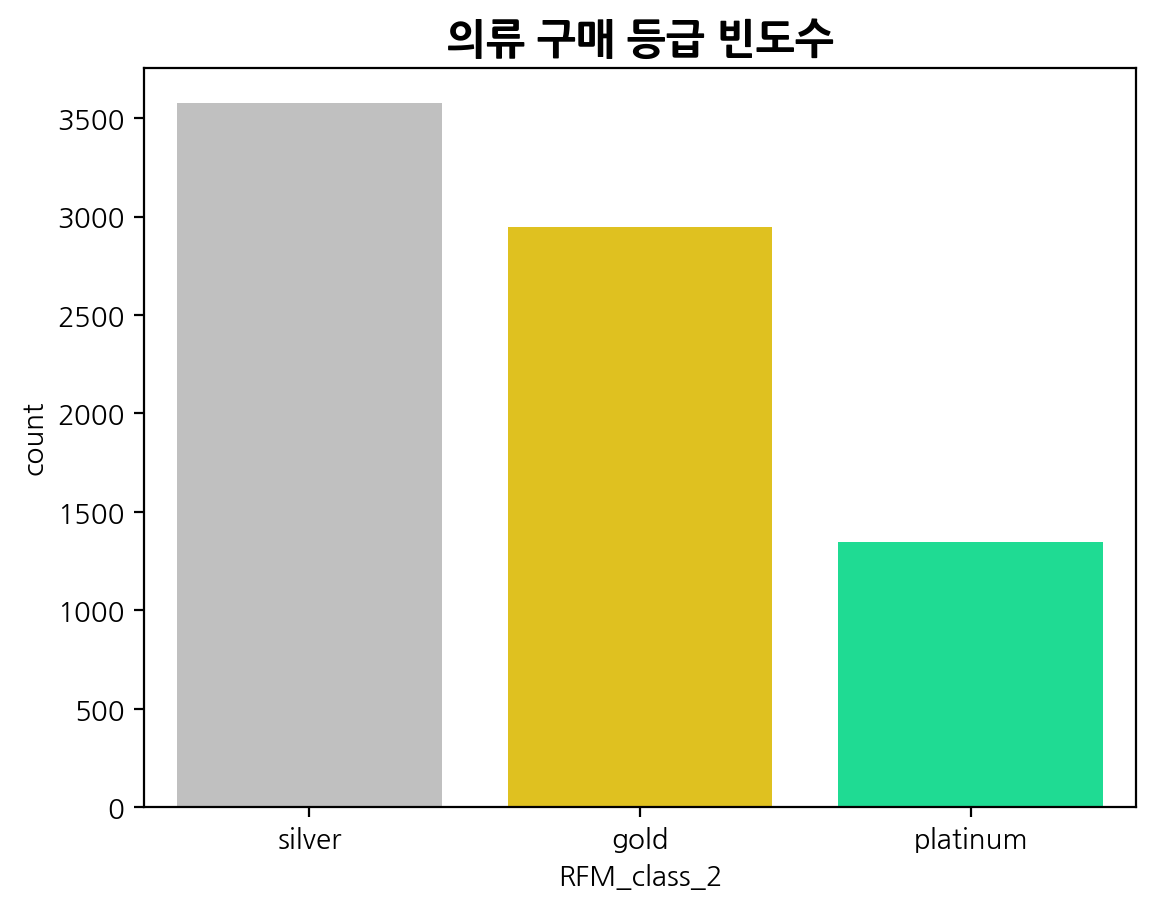

In [241]:
rfm['RFM_class_2'] = rfm['RFM_class'].map({'silver':0,'gold':1,'platinum':2})
sns.countplot(data = rfm, 
              x = 'RFM_class_2',
              palette = ['silver','gold','mediumspringgreen'])
plt.xticks(ticks = [0,1,2], labels = ['silver','gold','platinum'])
plt.title('의류 구매 등급 빈도수',weight = 'bold', size = 15)

## '플래티넘' 등급만 가져오기

## RFM class 와 병합하기 위한 전처리

In [171]:
view_df = df[df['event_type']== 'view'].groupby('user_id').agg({'hour':'mean','min':'mean','Weeks':'mean','요일':'mean'}).reset_index()
cart_df = df[df['event_type']== 'cart'].groupby('user_id').agg({'hour':'mean','min':'mean','Weeks':'mean','요일':'mean'}).reset_index()
purchase_df = df[df['event_type']== 'purchase'].groupby('user_id').agg({'hour':'mean','min':'mean','Weeks':'mean','요일':'mean'}).reset_index()

In [172]:
view_rfm = pd.merge(rfm,view_df)
cart_rfm = pd.merge(rfm,cart_df)
purchase_rfm = pd.merge(rfm,purchase_df)

In [173]:
view_rfm

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_class,hour,min,Weeks,요일
0,353600697,11,1,88.03,2,4,3,243,9,gold,8.161290,38.419355,3.967742,1.935484
1,506255779,2,1,77.22,1,4,3,143,8,silver,9.000000,45.000000,5.000000,4.000000
2,512168831,5,1,127.42,1,4,2,142,7,silver,11.538462,35.333333,4.435897,3.282051
3,512363886,14,1,25.74,2,4,4,244,10,gold,12.000000,19.750000,4.000000,6.000000
4,512364888,2,2,93.44,1,1,2,112,4,silver,8.000000,32.983871,4.021505,3.247312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,579664706,1,1,88.03,1,4,3,143,8,silver,13.000000,34.800000,5.000000,5.000000
7859,579744564,1,1,79.02,1,4,3,143,8,silver,15.464286,32.285714,5.000000,5.000000
7860,579828565,1,1,80.83,1,4,3,143,8,silver,18.000000,30.071429,5.000000,5.000000
7861,579833547,1,1,80.83,1,4,3,143,8,silver,18.000000,33.000000,5.000000,5.000000


## 유저 별 평균 조회시간을 도출하였고, 그래프상으로 이산변수를 표현하기 위해 소숫점을 반올림해주자 

In [174]:
df_list = [view_rfm,cart_rfm,purchase_rfm]

cols = ['Weeks','요일','hour','min']

for _ in df_list:
    for k in cols:
        _[k] = _[k].map(lambda x:int(round(x,0)))

In [175]:
view_rfm

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_class,hour,min,Weeks,요일
0,353600697,11,1,88.03,2,4,3,243,9,gold,8,38,4,2
1,506255779,2,1,77.22,1,4,3,143,8,silver,9,45,5,4
2,512168831,5,1,127.42,1,4,2,142,7,silver,12,35,4,3
3,512363886,14,1,25.74,2,4,4,244,10,gold,12,20,4,6
4,512364888,2,2,93.44,1,1,2,112,4,silver,8,33,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,579664706,1,1,88.03,1,4,3,143,8,silver,13,35,5,5
7859,579744564,1,1,79.02,1,4,3,143,8,silver,15,32,5,5
7860,579828565,1,1,80.83,1,4,3,143,8,silver,18,30,5,5
7861,579833547,1,1,80.83,1,4,3,143,8,silver,18,33,5,5


## 등급별 'view' 시각

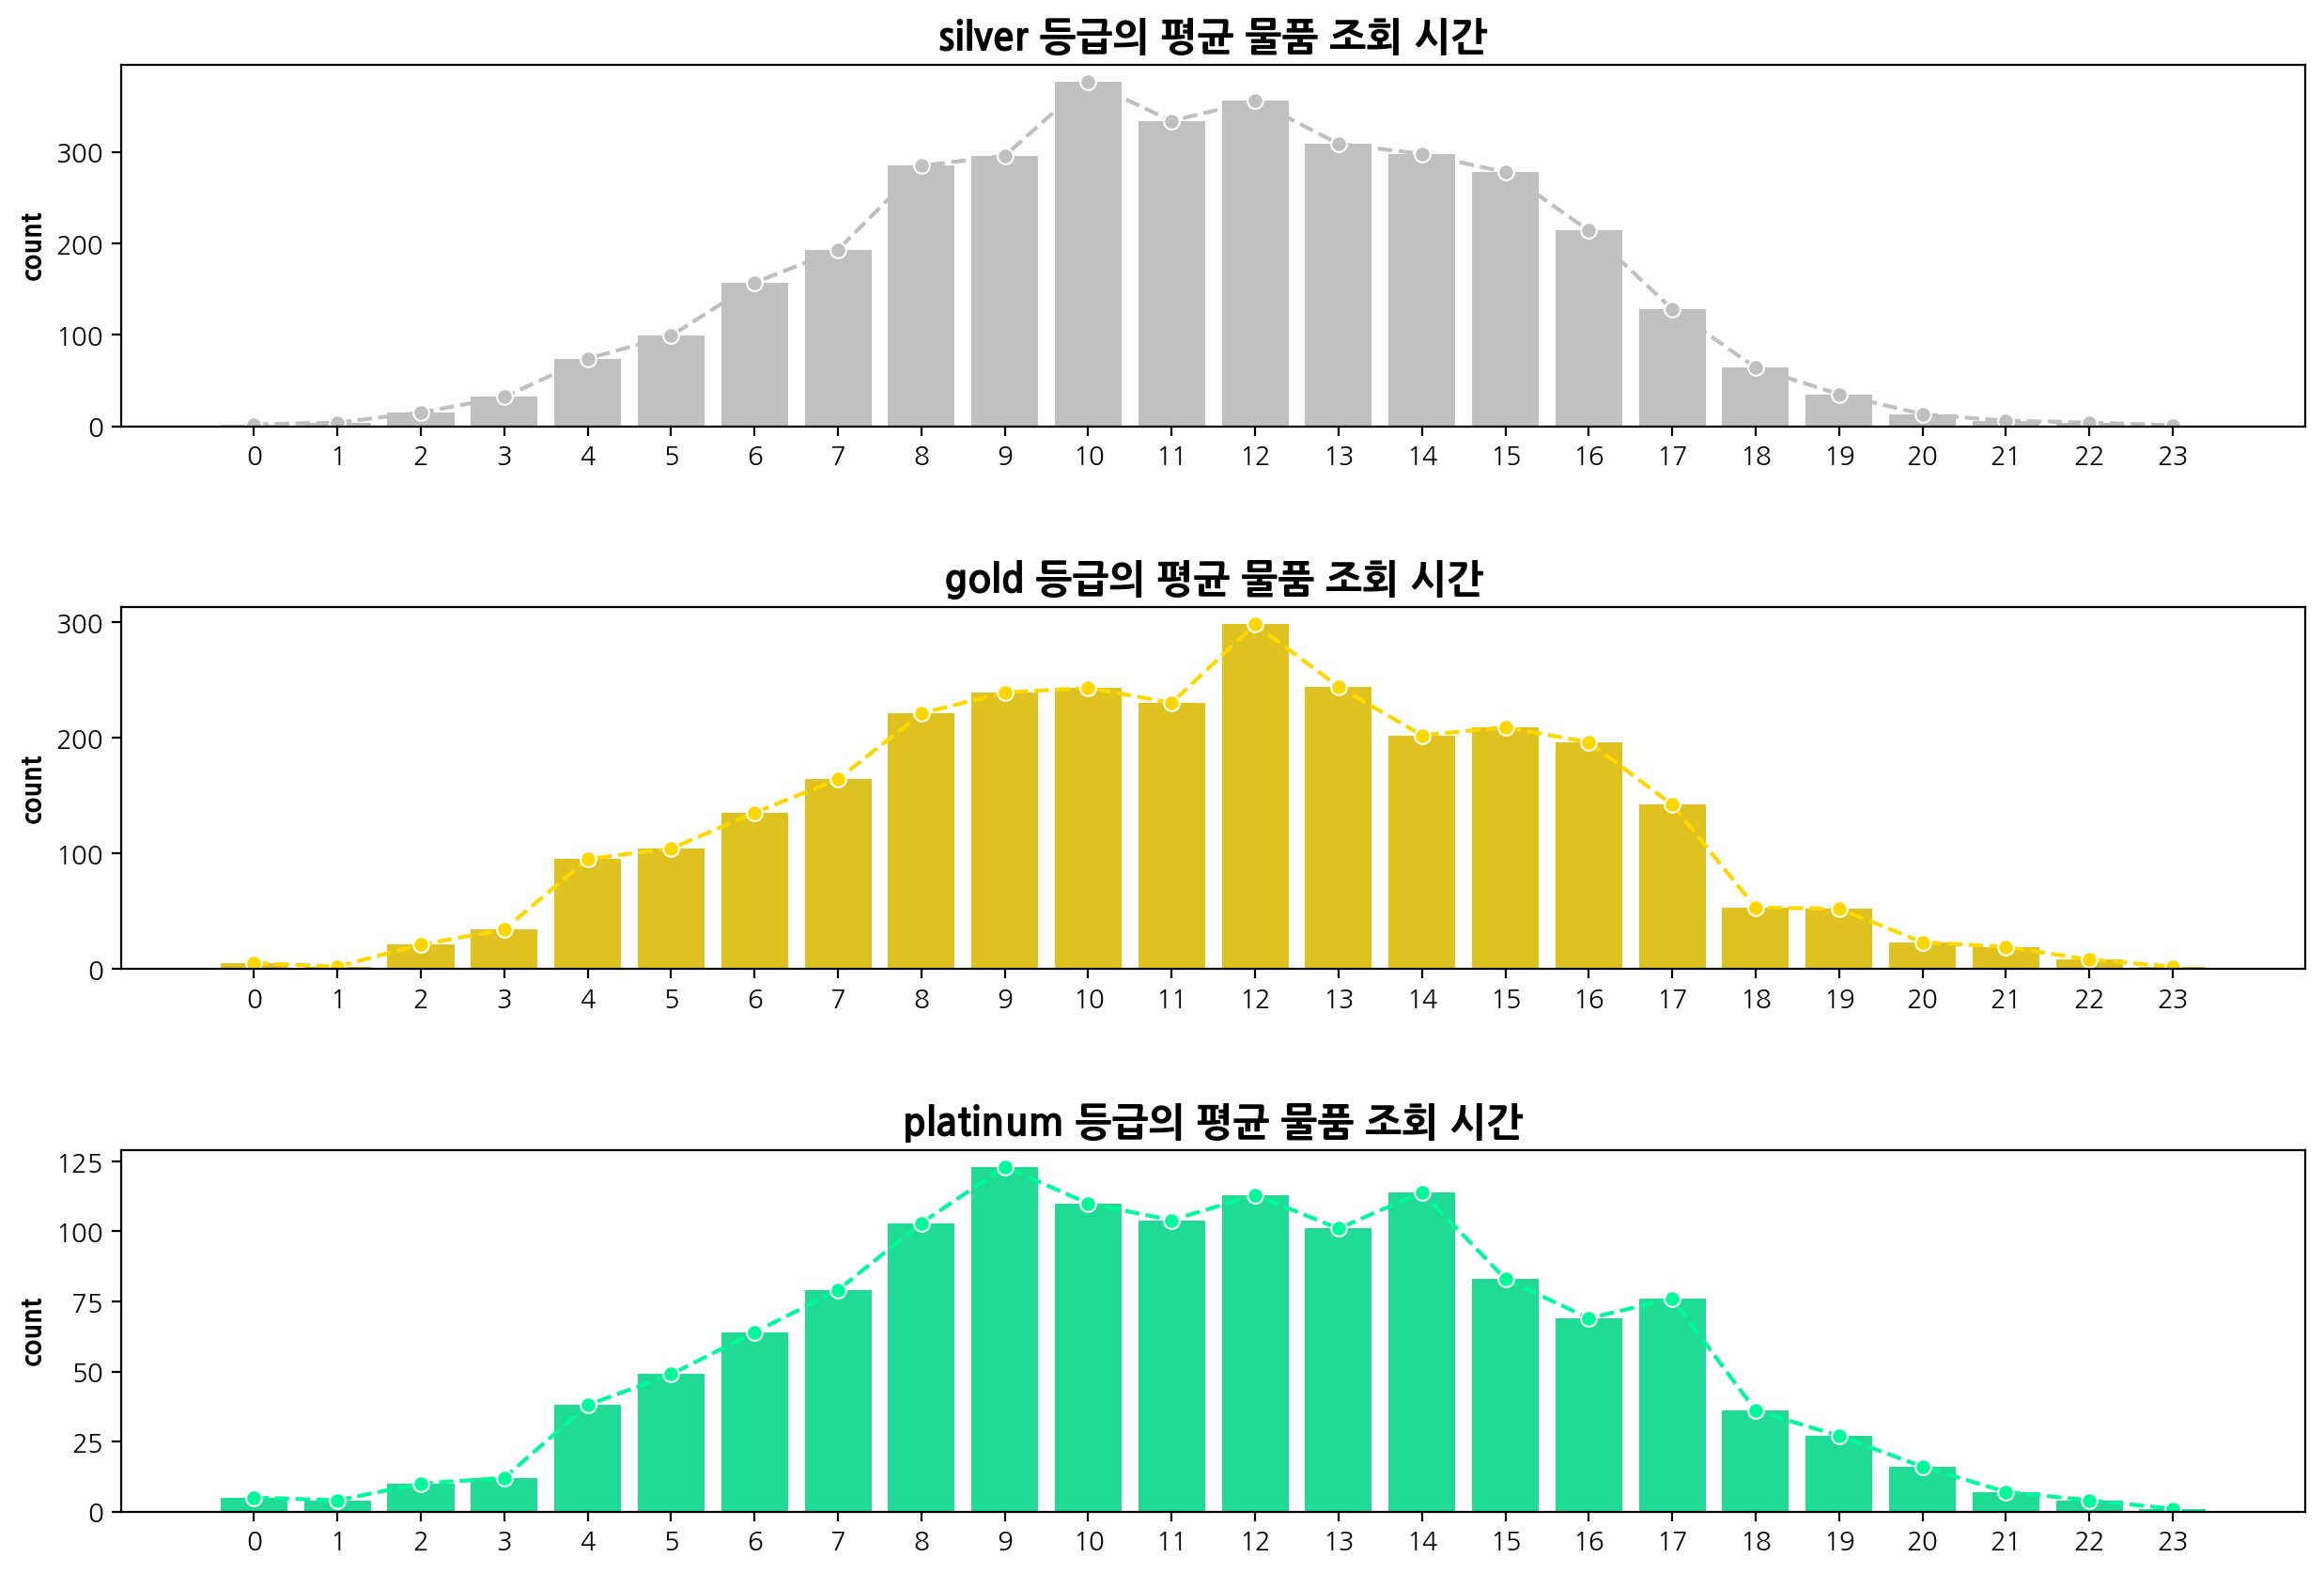

In [207]:
plt.figure(figsize = [15,10])

plt.subplots_adjust(hspace = 0.5)

cols = ['silver','gold','platinum']

colors = ['silver','gold','mediumspringgreen']

i = 1

for _ in cols:
    
    graph_df = view_rfm[view_rfm['RFM_class'] == _].groupby('hour').agg({'RFM_class':'count'}).reset_index()
    
    plt.subplot(3,1,i)
    
    sns.barplot(data = graph_df,
                    x = 'hour',
                    y = 'RFM_class',
                    color = colors[i-1])
    
    sns.lineplot(data = graph_df,
                    x = 'hour',
                    y = 'RFM_class',
                    color = colors[i-1],
                    marker = 'o',
                    ci = None,
                    ls = '--')
    

    
    i += 1 
    
    plt.title(f'{_} 등급의 평균 물품 조회 시간',weight = 'bold', size  =15)
    
    plt.ylabel('count',weight = 'bold')
    plt.xlabel('')

## 등급별 'view' 분

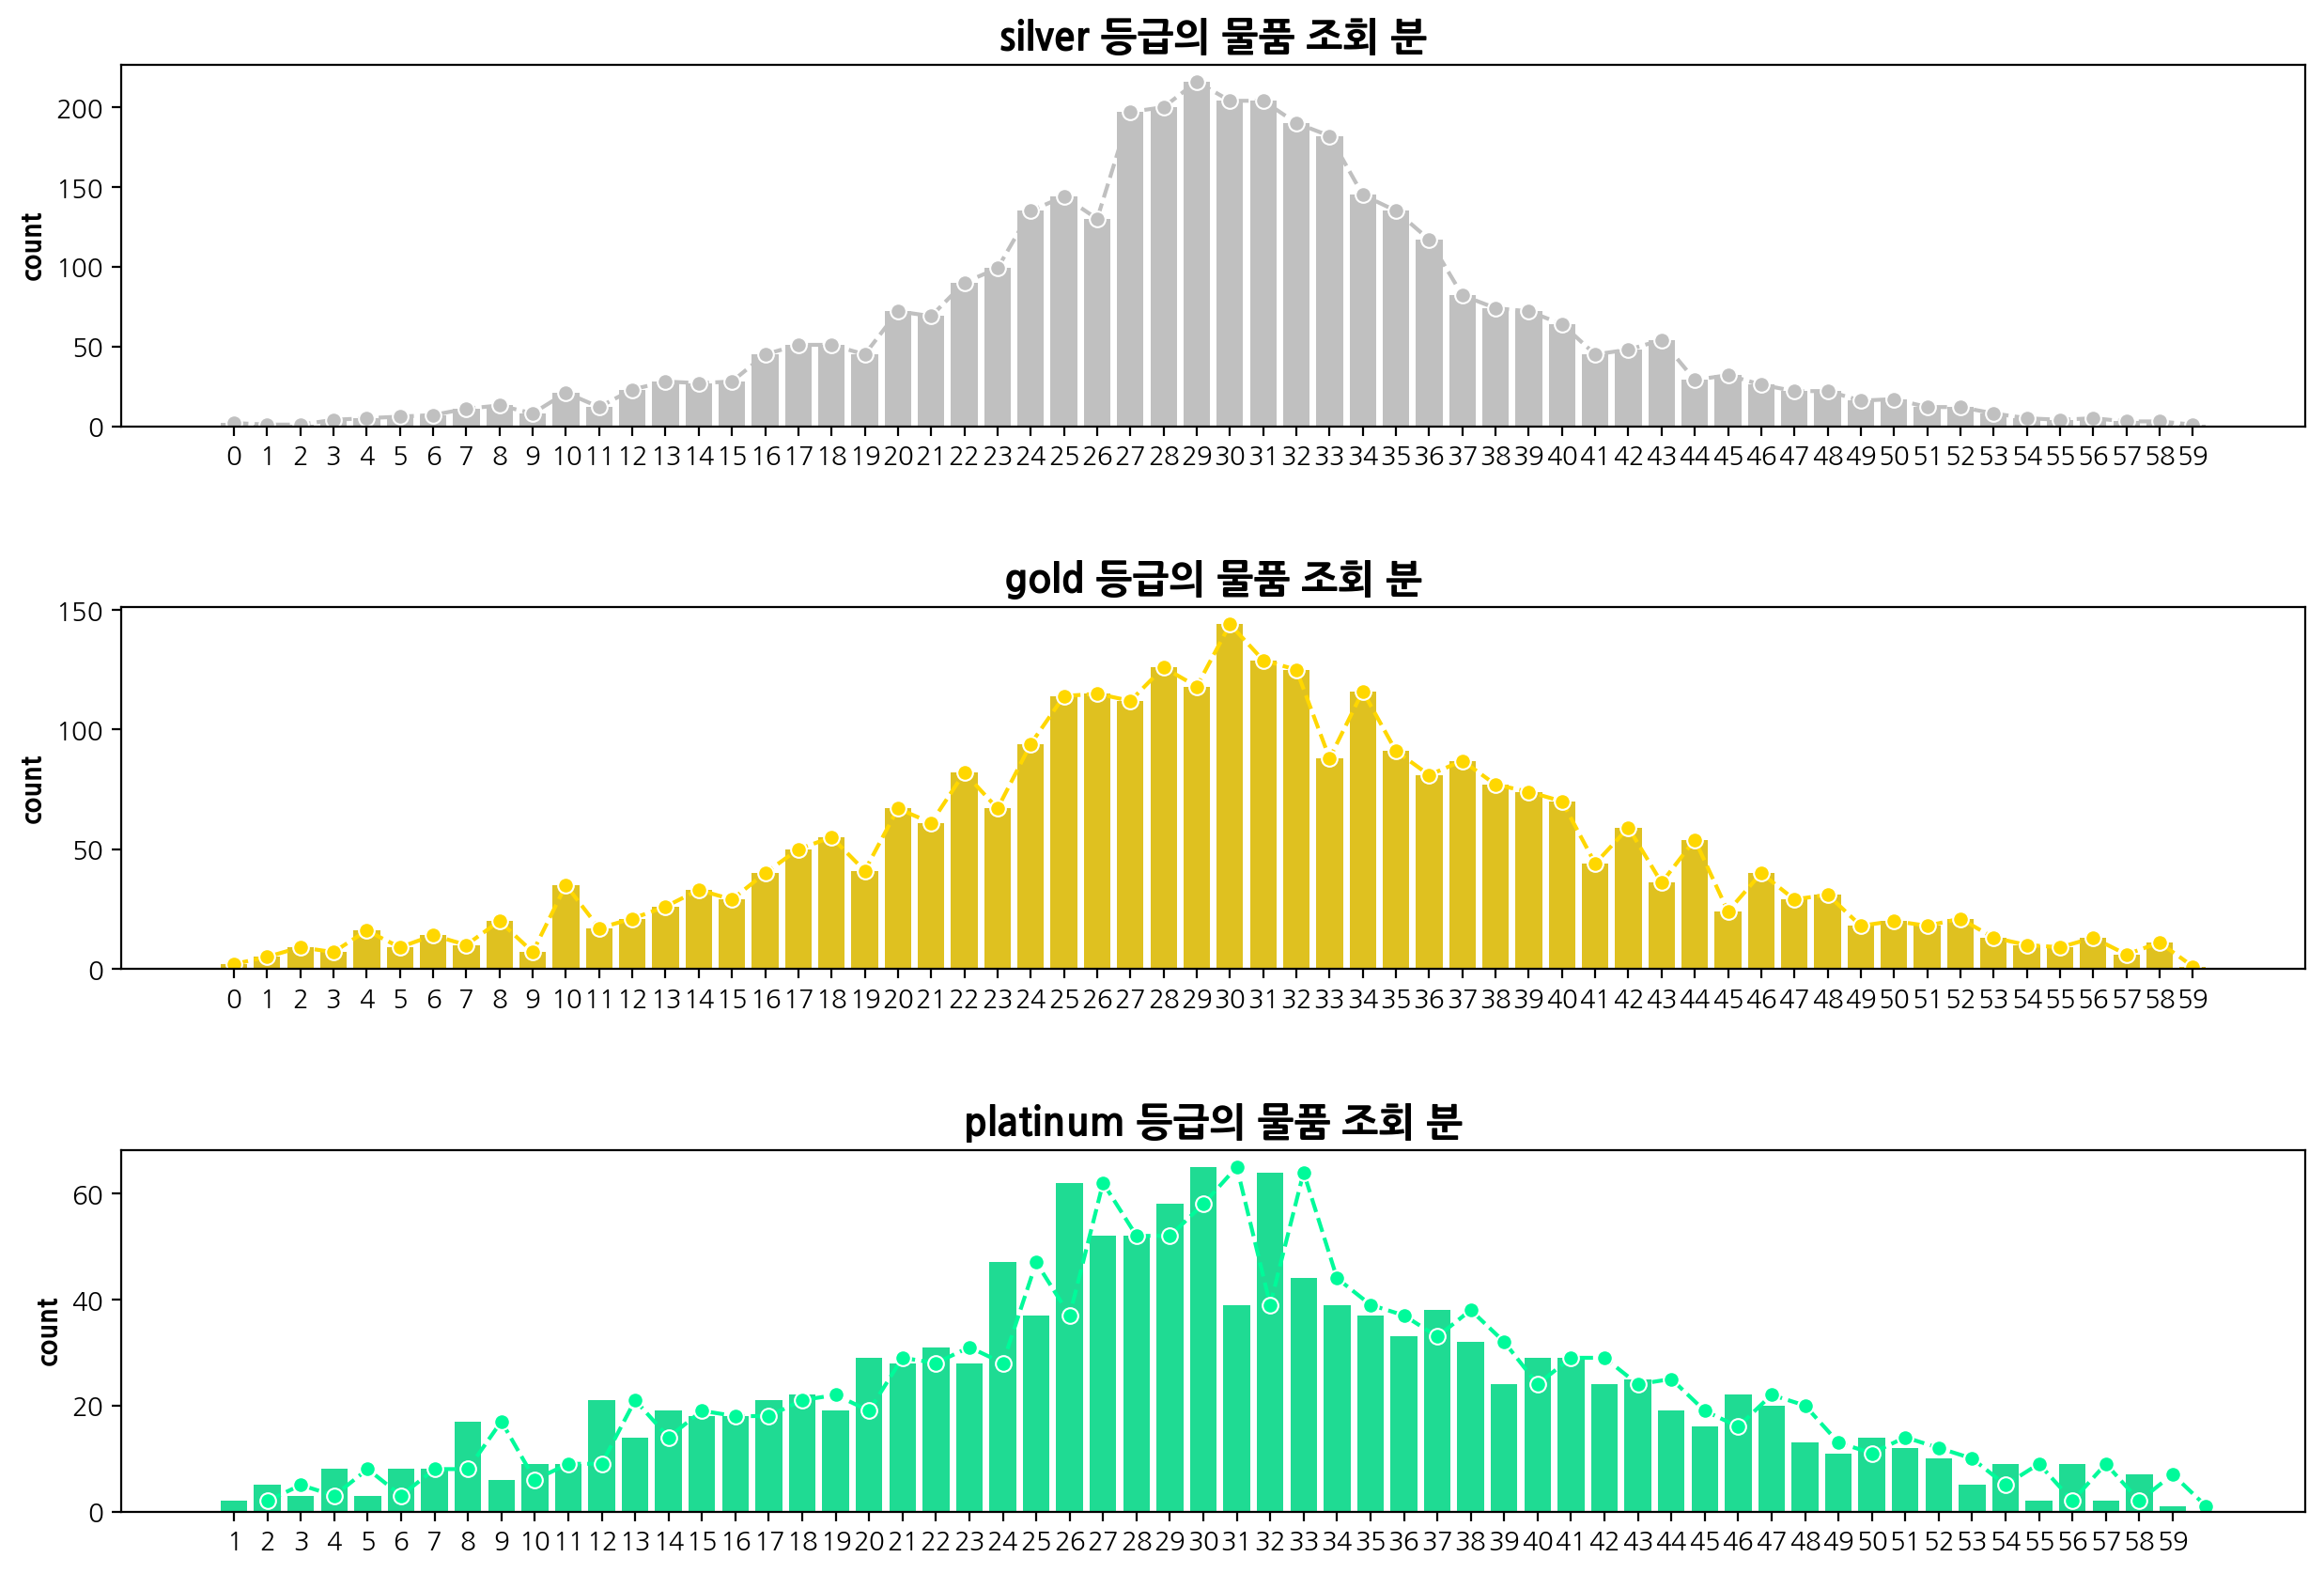

In [208]:
plt.figure(figsize = [15,10])

plt.subplots_adjust(hspace = 0.5)
colors = ['silver','gold','mediumspringgreen']
cols = ['silver','gold','platinum']

i = 1

for _ in cols:
    
    graph_df = view_rfm[view_rfm['RFM_class'] == _].groupby('min').agg({'RFM_class':'count'}).reset_index()
    
    plt.subplot(3,1,i)
    
    sns.barplot(data = graph_df,
                    x = 'min',
                    y = 'RFM_class',
                    color = colors[i-1])
    
    sns.lineplot(data = graph_df,
                    x = 'min',
                    y = 'RFM_class',
                    color = colors[i-1],
                    marker = 'o',
                    ci = None,
                    ls = '--')
    

    
    i += 1 
    
    plt.title(f'{_} 등급의 물품 조회 분',weight = 'bold', size  =15)
    
    plt.ylabel('count',weight = 'bold')
    plt.xlabel('')

## 등급별 'purchase' 시각

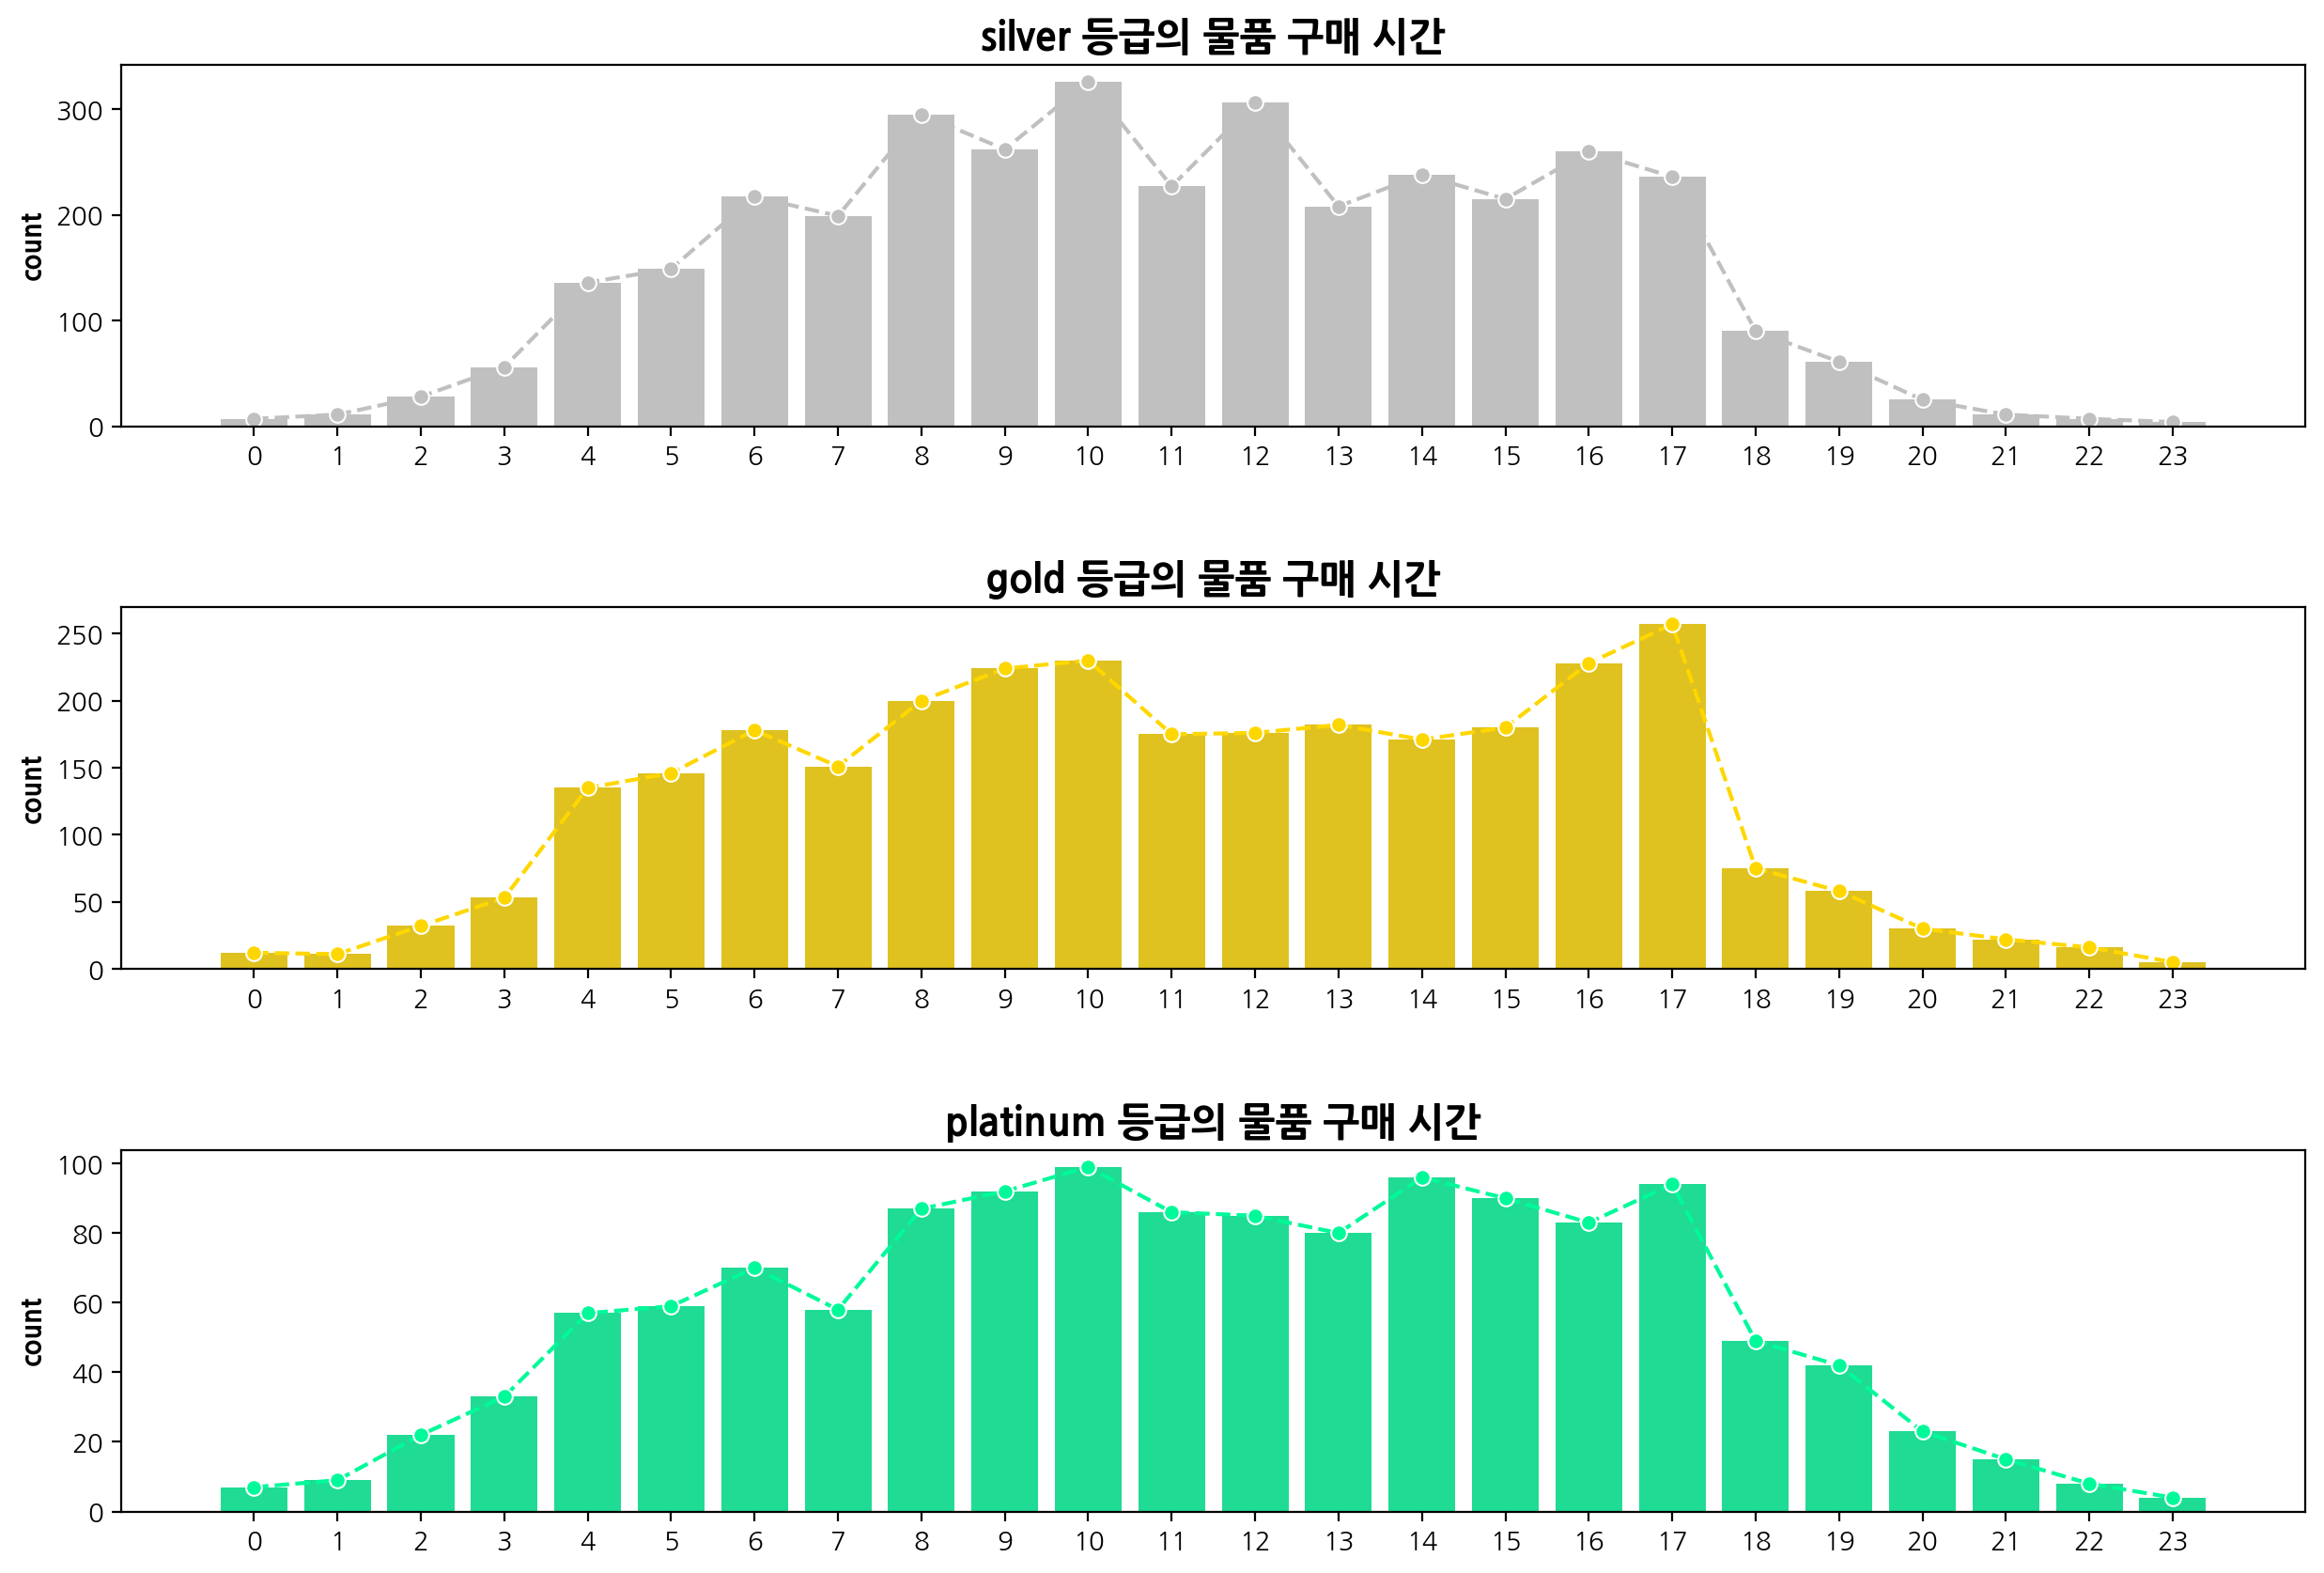

In [214]:
plt.figure(figsize = [15,10])

plt.subplots_adjust(hspace = 0.5)
colors = ['silver','gold','mediumspringgreen']
cols = ['silver','gold','platinum']

i = 1

for _ in cols:
    
    graph_df = purchase_rfm[purchase_rfm['RFM_class'] == _].groupby('hour').agg({'RFM_class':'count'}).reset_index()
    
    plt.subplot(3,1,i)
    
    sns.barplot(data = graph_df,
                    x = 'hour',
                    y = 'RFM_class',
                    color = colors[i-1])
    
    sns.lineplot(data = graph_df,
                    x = 'hour',
                    y = 'RFM_class',
                    color = colors[i-1],
                    marker = 'o',
                    ci = None,
                    ls = '--')
    

    
    i += 1 

    plt.title(f'{_} 등급의 물품 구매 시간',weight = 'bold', size  =15)

    plt.ylabel('count',weight = 'bold')
    plt.xlabel('')

## 등급별 'purchase' 분

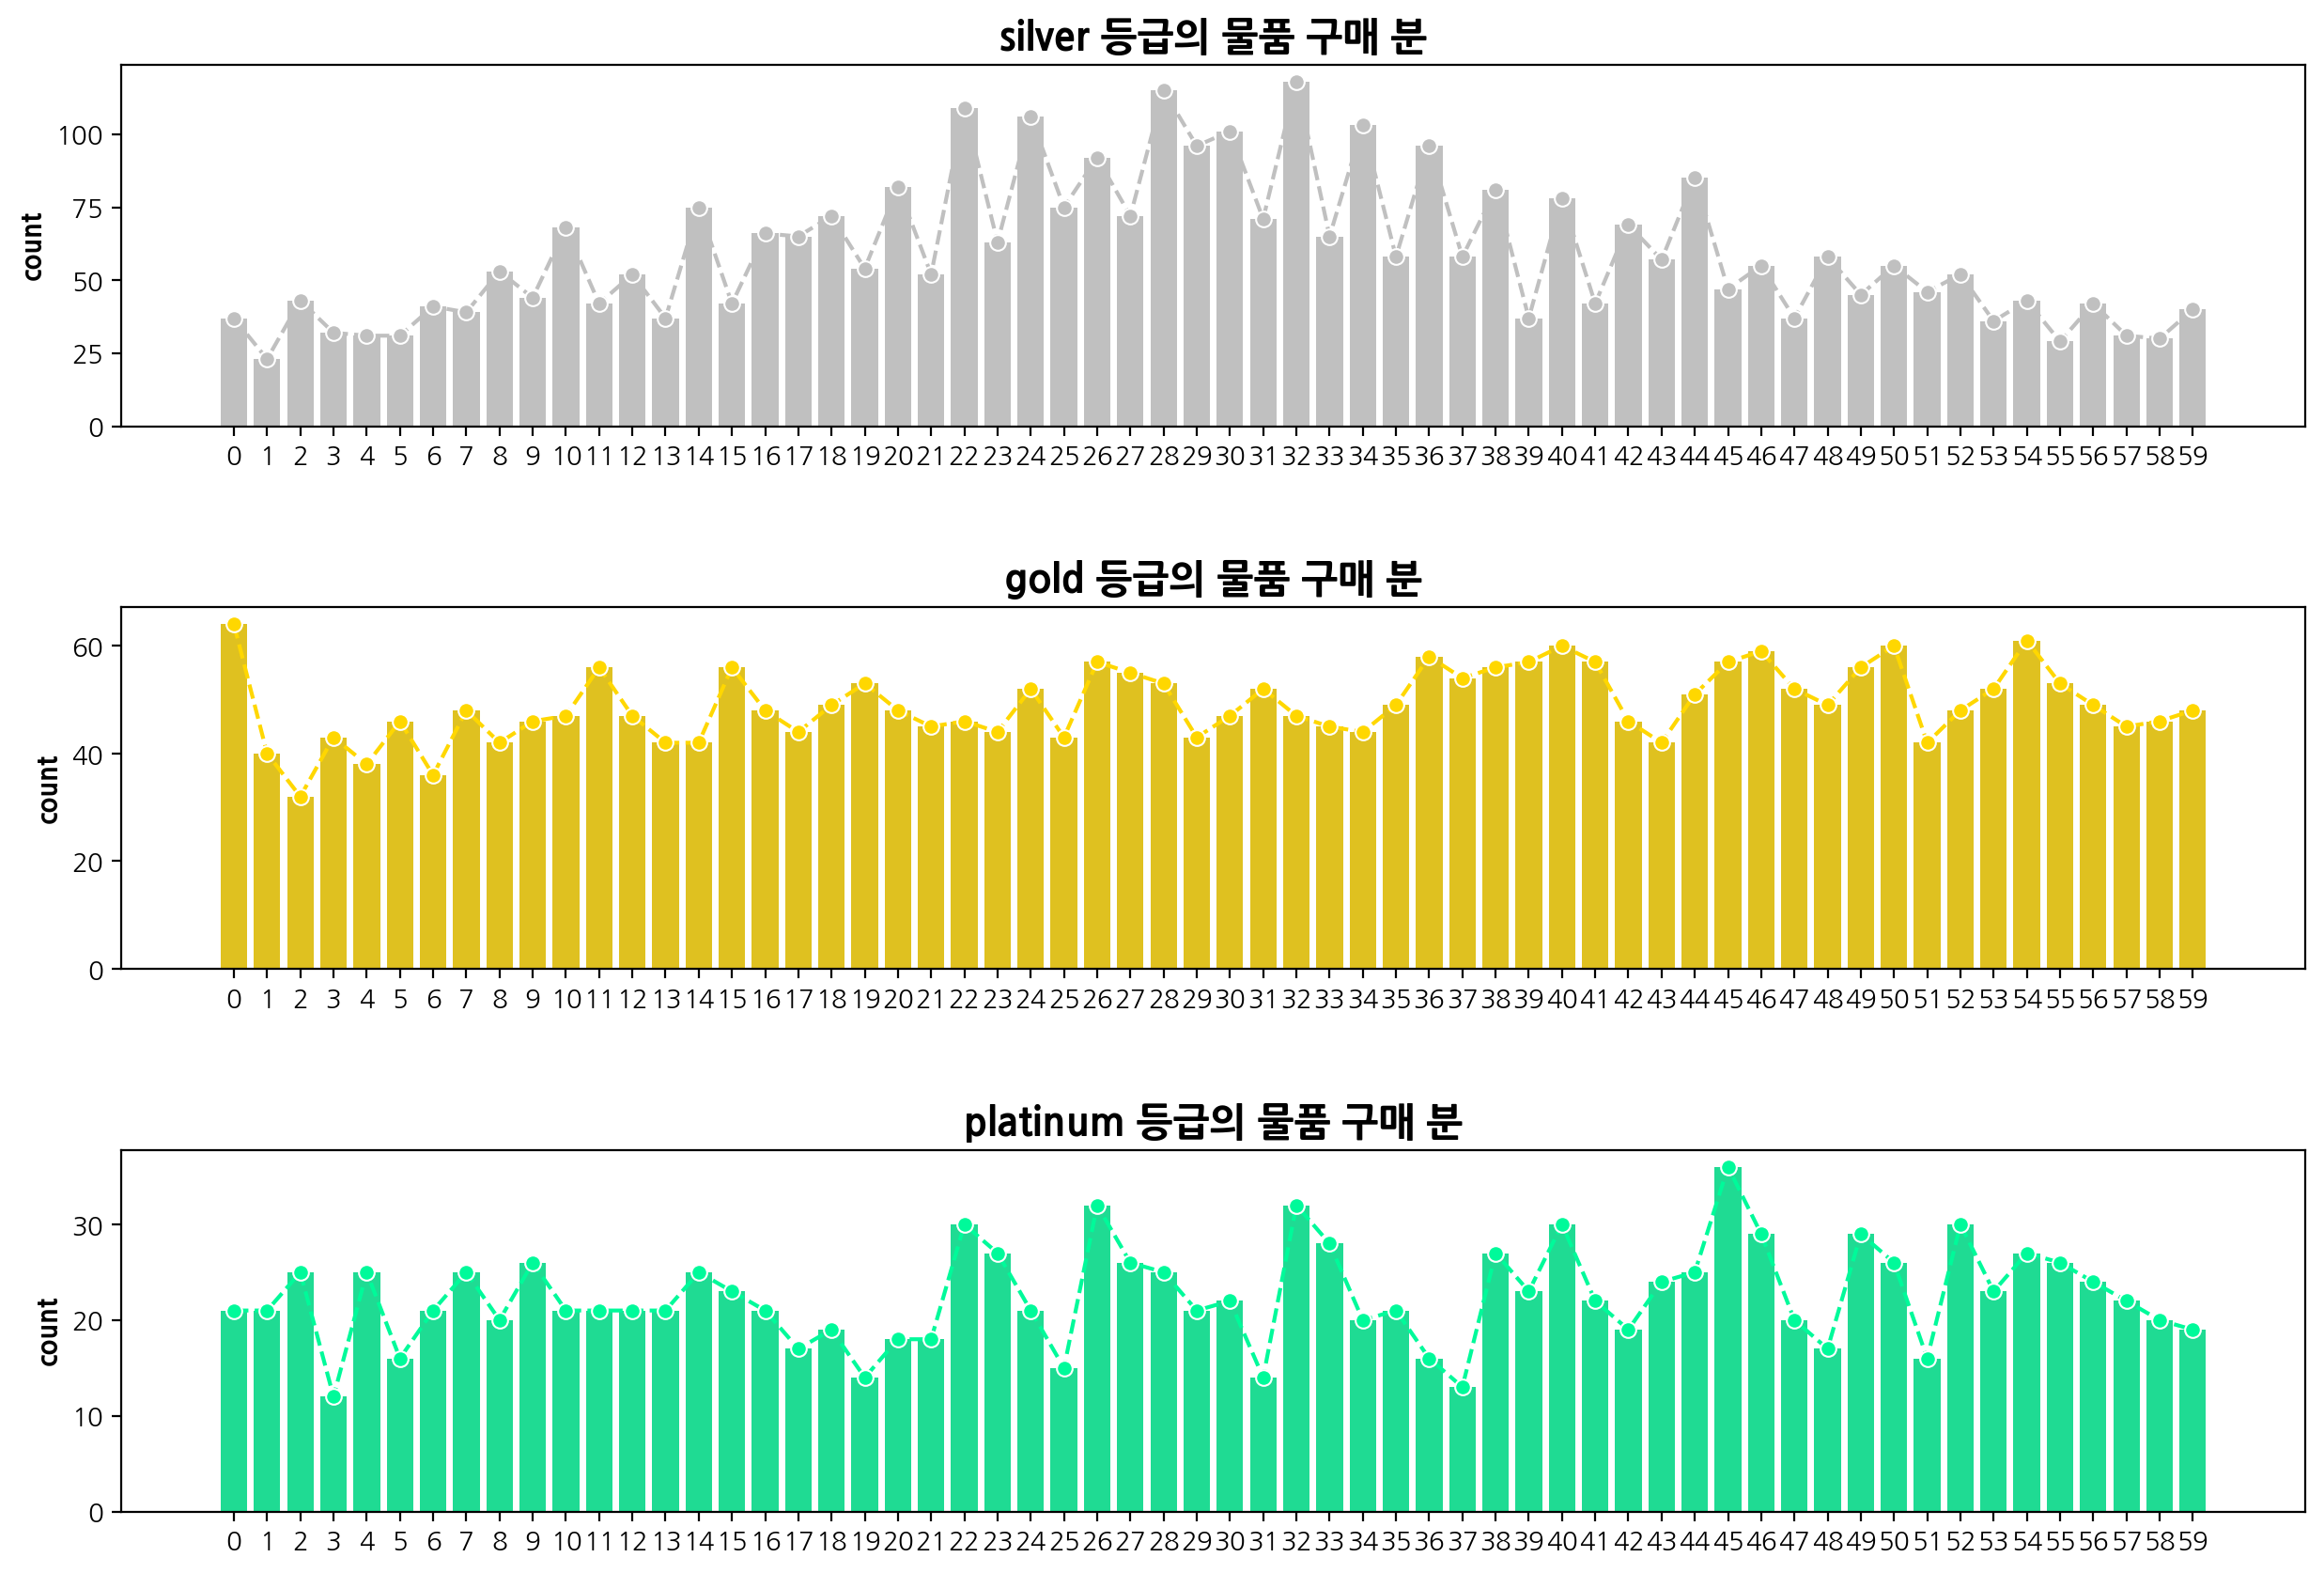

In [215]:
plt.figure(figsize = [15,10])

plt.subplots_adjust(hspace = 0.5)

cols = ['silver','gold','platinum']
colors = ['silver','gold','mediumspringgreen']
i = 1

for _ in cols:
    
    graph_df = purchase_rfm[purchase_rfm['RFM_class'] == _].groupby('min').agg({'RFM_class':'count'}).reset_index()
    
    plt.subplot(3,1,i)
    
    sns.barplot(data = graph_df,
                    x = 'min',
                    y = 'RFM_class',
                    color = colors[i-1])
    
    sns.lineplot(data = graph_df,
                    x = 'min',
                    y = 'RFM_class',
                    color = colors[i-1],
                    marker = 'o',
                    ci = None,
                    ls = '--')
    

    
    i += 1 
    
    plt.title(f'{_} 등급의 물품 구매 분',weight = 'bold', size  =15)

    plt.ylabel('count',weight = 'bold')
    plt.xlabel('')

## 등급별 'view' 요일

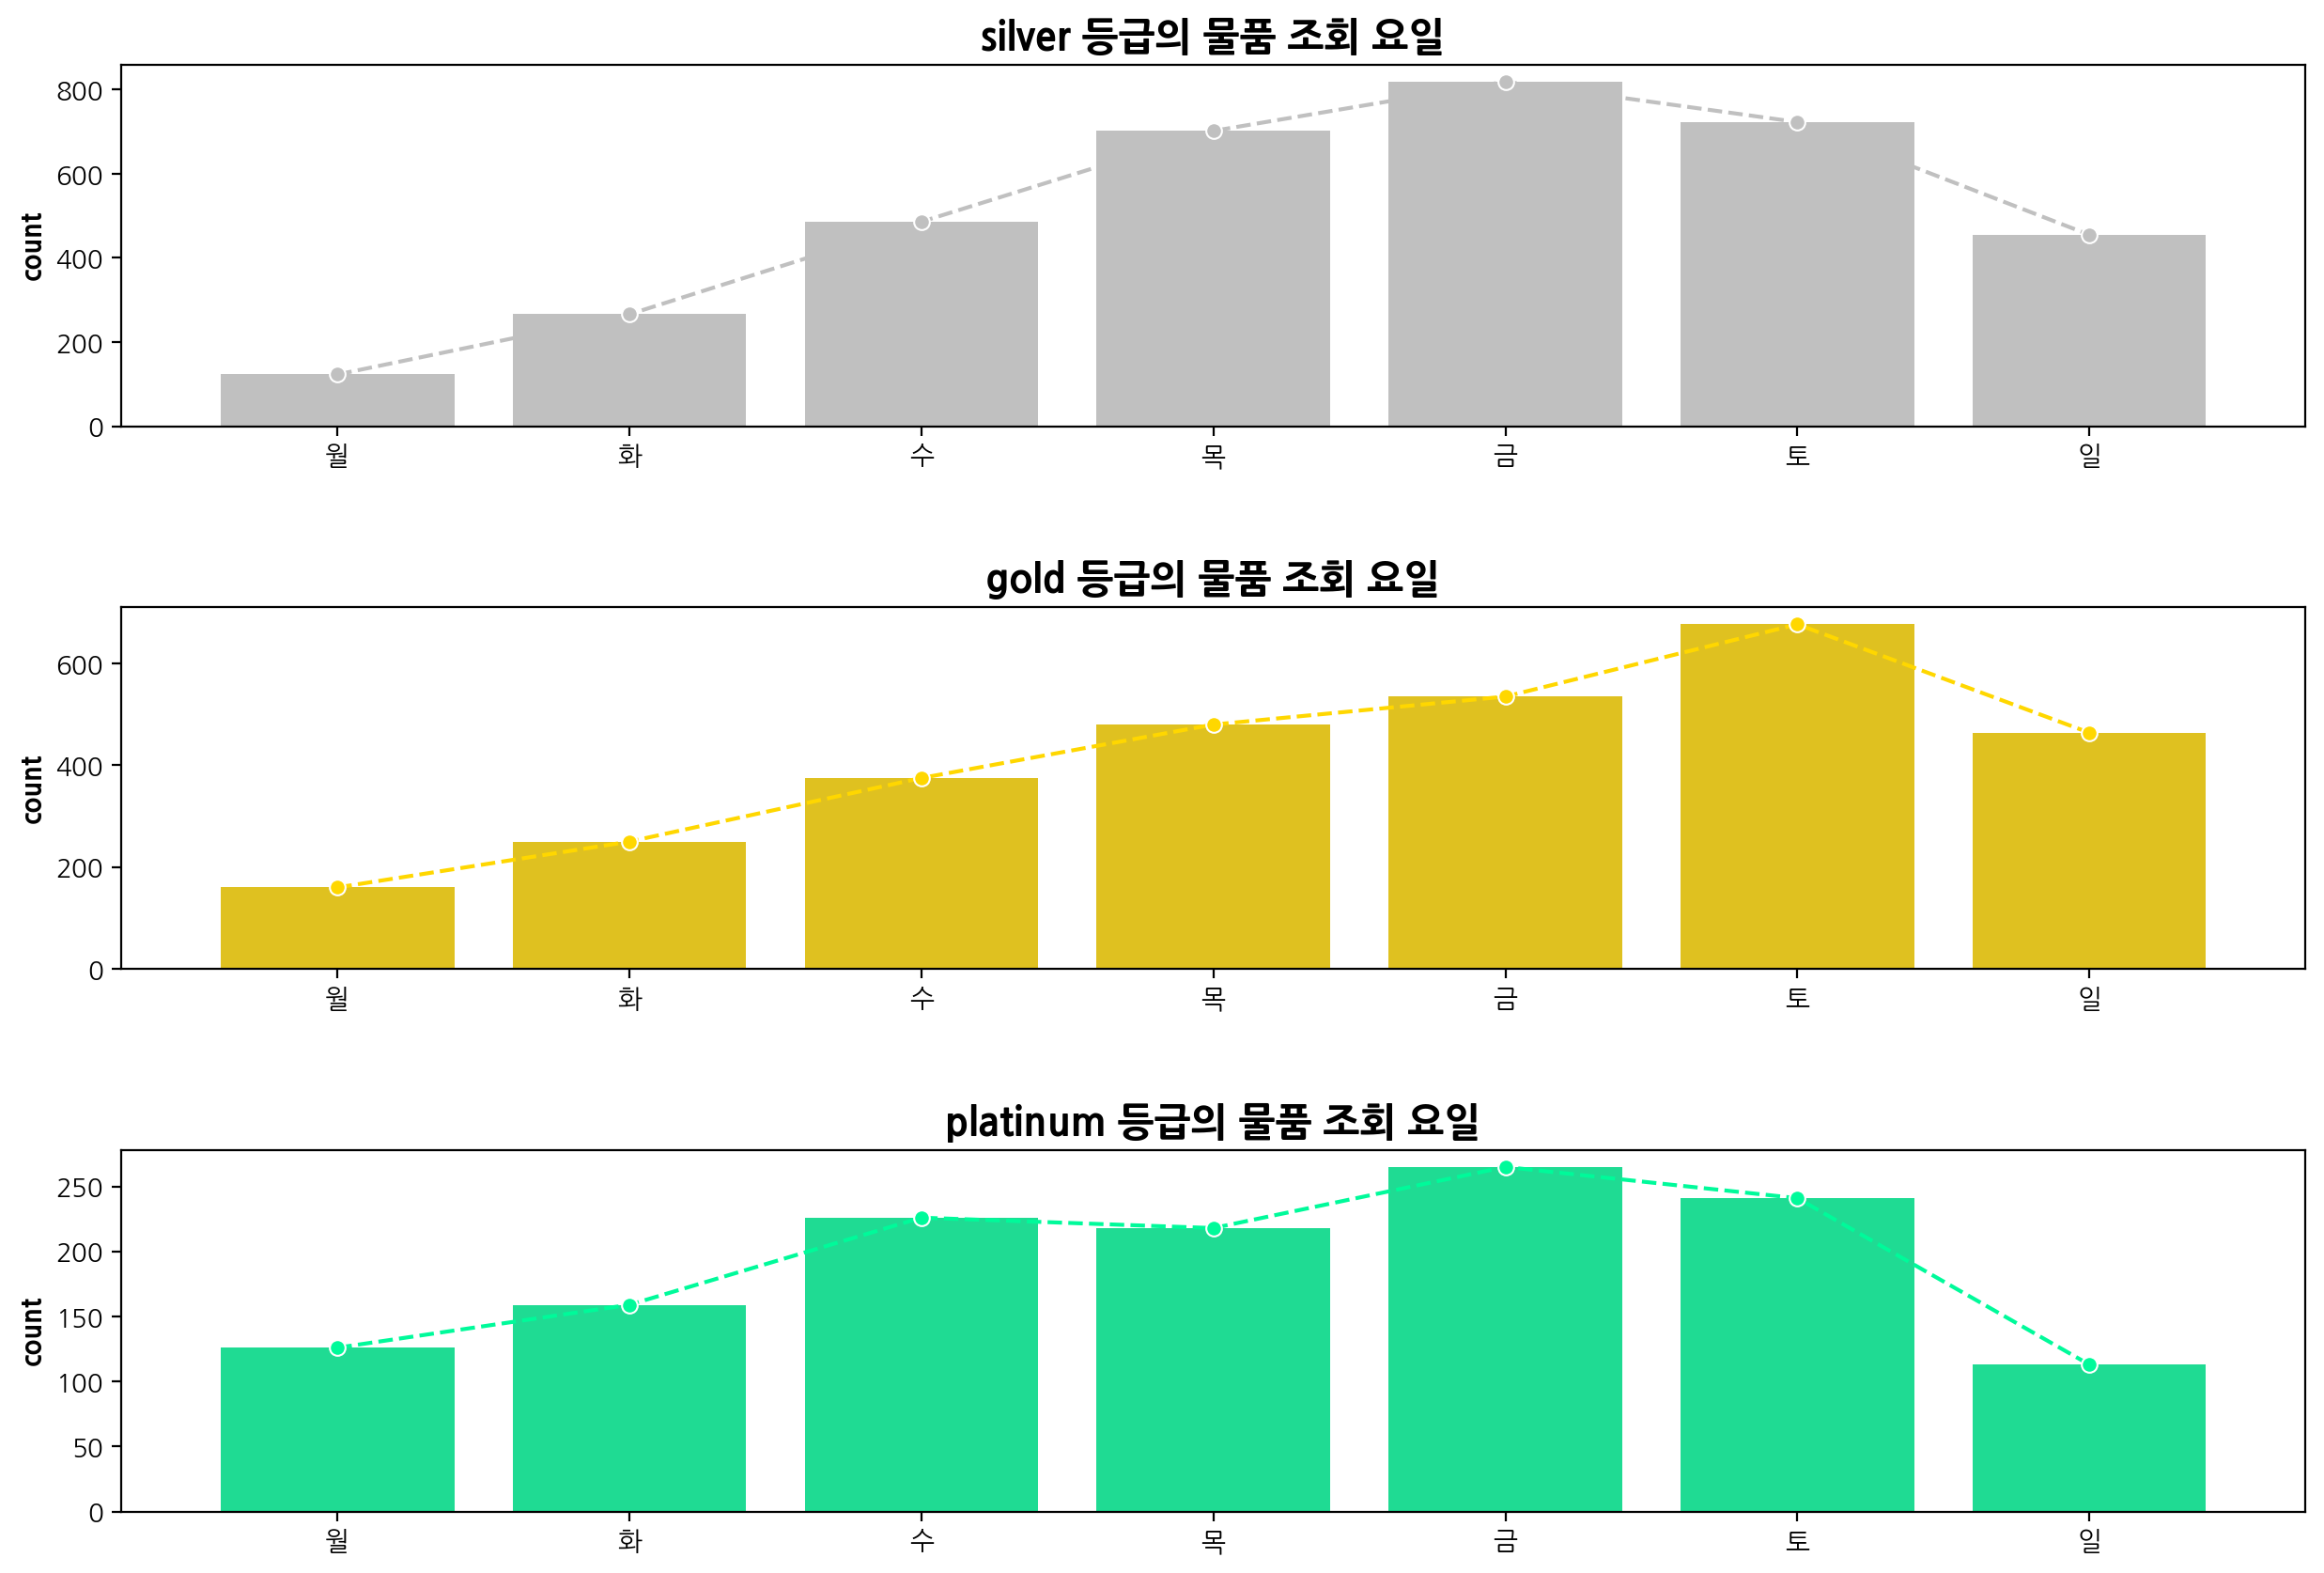

In [216]:
plt.figure(figsize = [15,10])

plt.subplots_adjust(hspace = 0.5)

cols = ['silver','gold','platinum']

i = 1

for _ in cols:
    
    graph_df = view_rfm[view_rfm['RFM_class'] == _].groupby('요일').agg({'RFM_class':'count'}).reset_index()
    
    plt.subplot(3,1,i)
    
    sns.barplot(data = graph_df,
                    x = '요일',
                    y = 'RFM_class',
                    color = colors[i-1])
    
    sns.lineplot(data = graph_df,
                    x = '요일',
                    y = 'RFM_class',
                    color = colors[i-1],
                    marker = 'o',
                    ci = None,
                    ls = '--')
    
    plt.xticks(ticks = [0,1,2,3,4,5,6],labels = (list('월화수목금토일')))
    
    i += 1 
    
    plt.title(f'{_} 등급의 물품 조회 요일',weight = 'bold', size  =15)

    plt.ylabel('count',weight = 'bold')
    plt.xlabel('')

## 등급별 'purchase' 요일

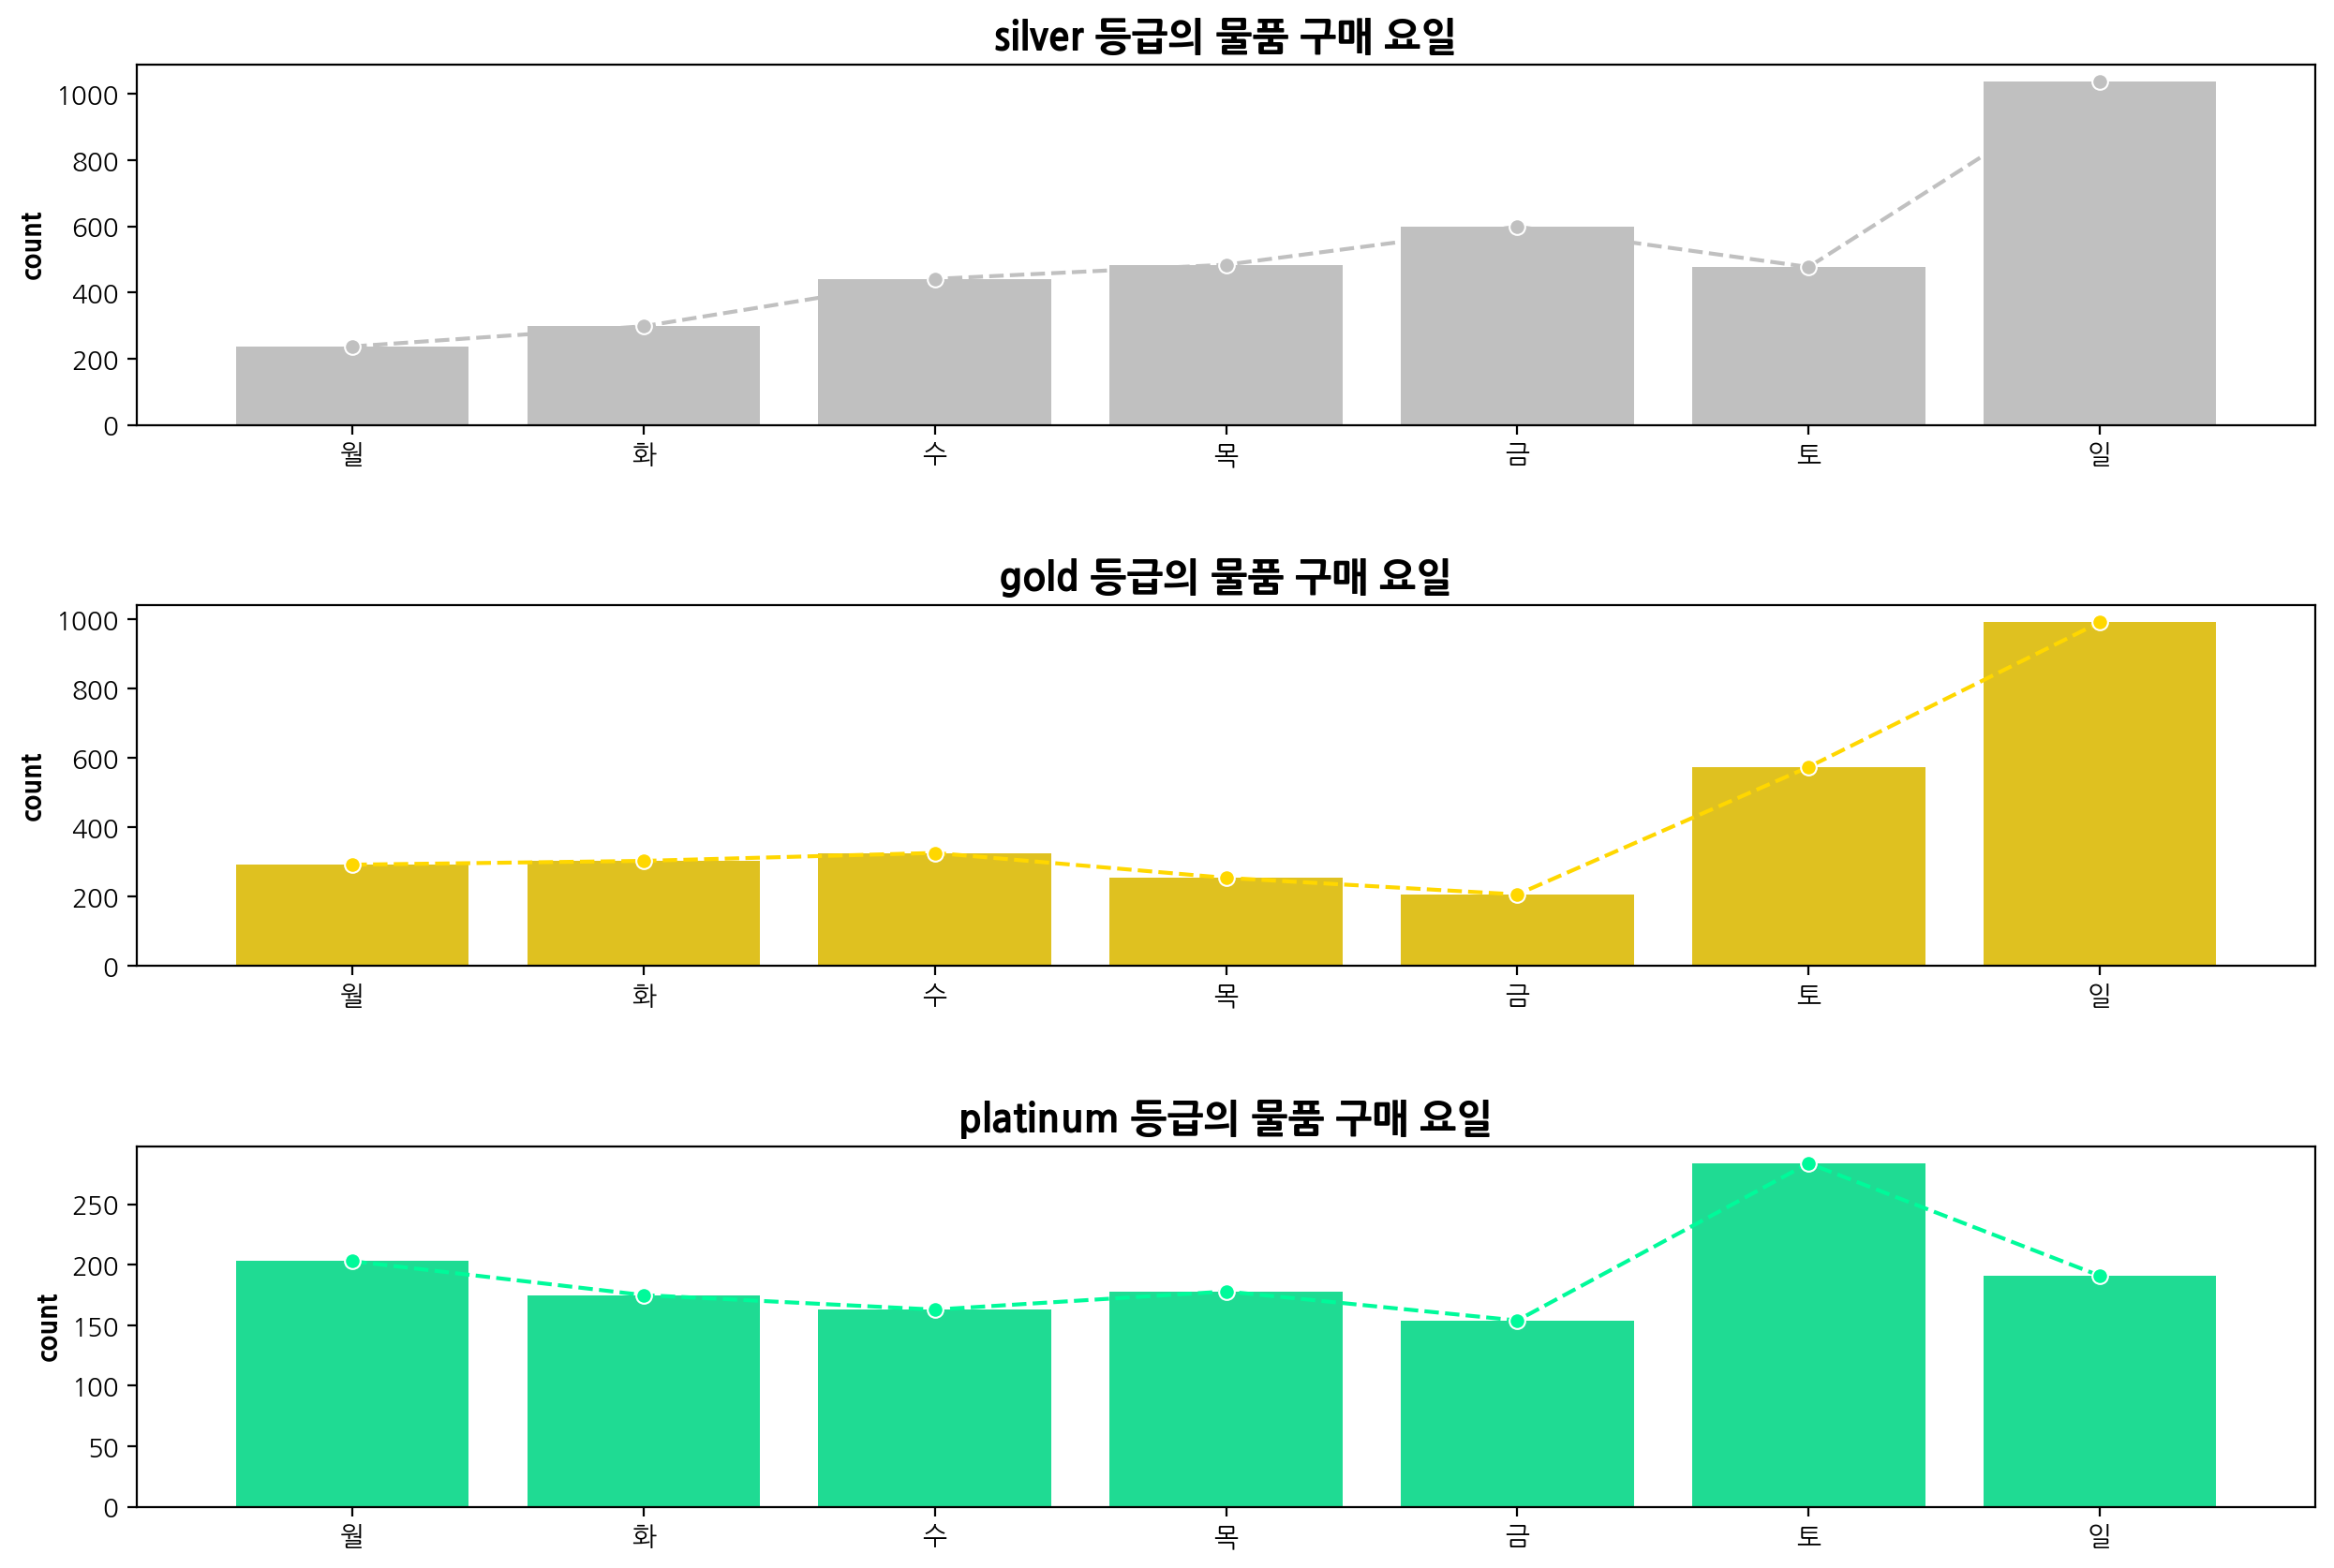

In [218]:
plt.figure(figsize = [15,10])

plt.subplots_adjust(hspace = 0.5)

cols = ['silver','gold','platinum']

i = 1

for _ in cols:
    
    graph_df = purchase_rfm[purchase_rfm['RFM_class'] == _].groupby('요일').agg({'RFM_class':'count'}).reset_index()
    
    plt.subplot(3,1,i)
    
    sns.barplot(data = graph_df,
                    x = '요일',
                    y = 'RFM_class',
                    color = colors[i-1])
    
    sns.lineplot(data = graph_df,
                    x = '요일',
                    y = 'RFM_class',
                    color = colors[i-1],
                    marker = 'o',
                    ci = None,
                    ls = '--')
    
    
    plt.xticks(ticks = [0,1,2,3,4,5,6],labels = (list('월화수목금토일')))
    

    
    i += 1 
    
    plt.title(f'{_} 등급의 물품 구매 요일',weight = 'bold', size  =15)

    plt.ylabel('count',weight = 'bold')
    plt.xlabel('')

## 등급별 'view' 주차별

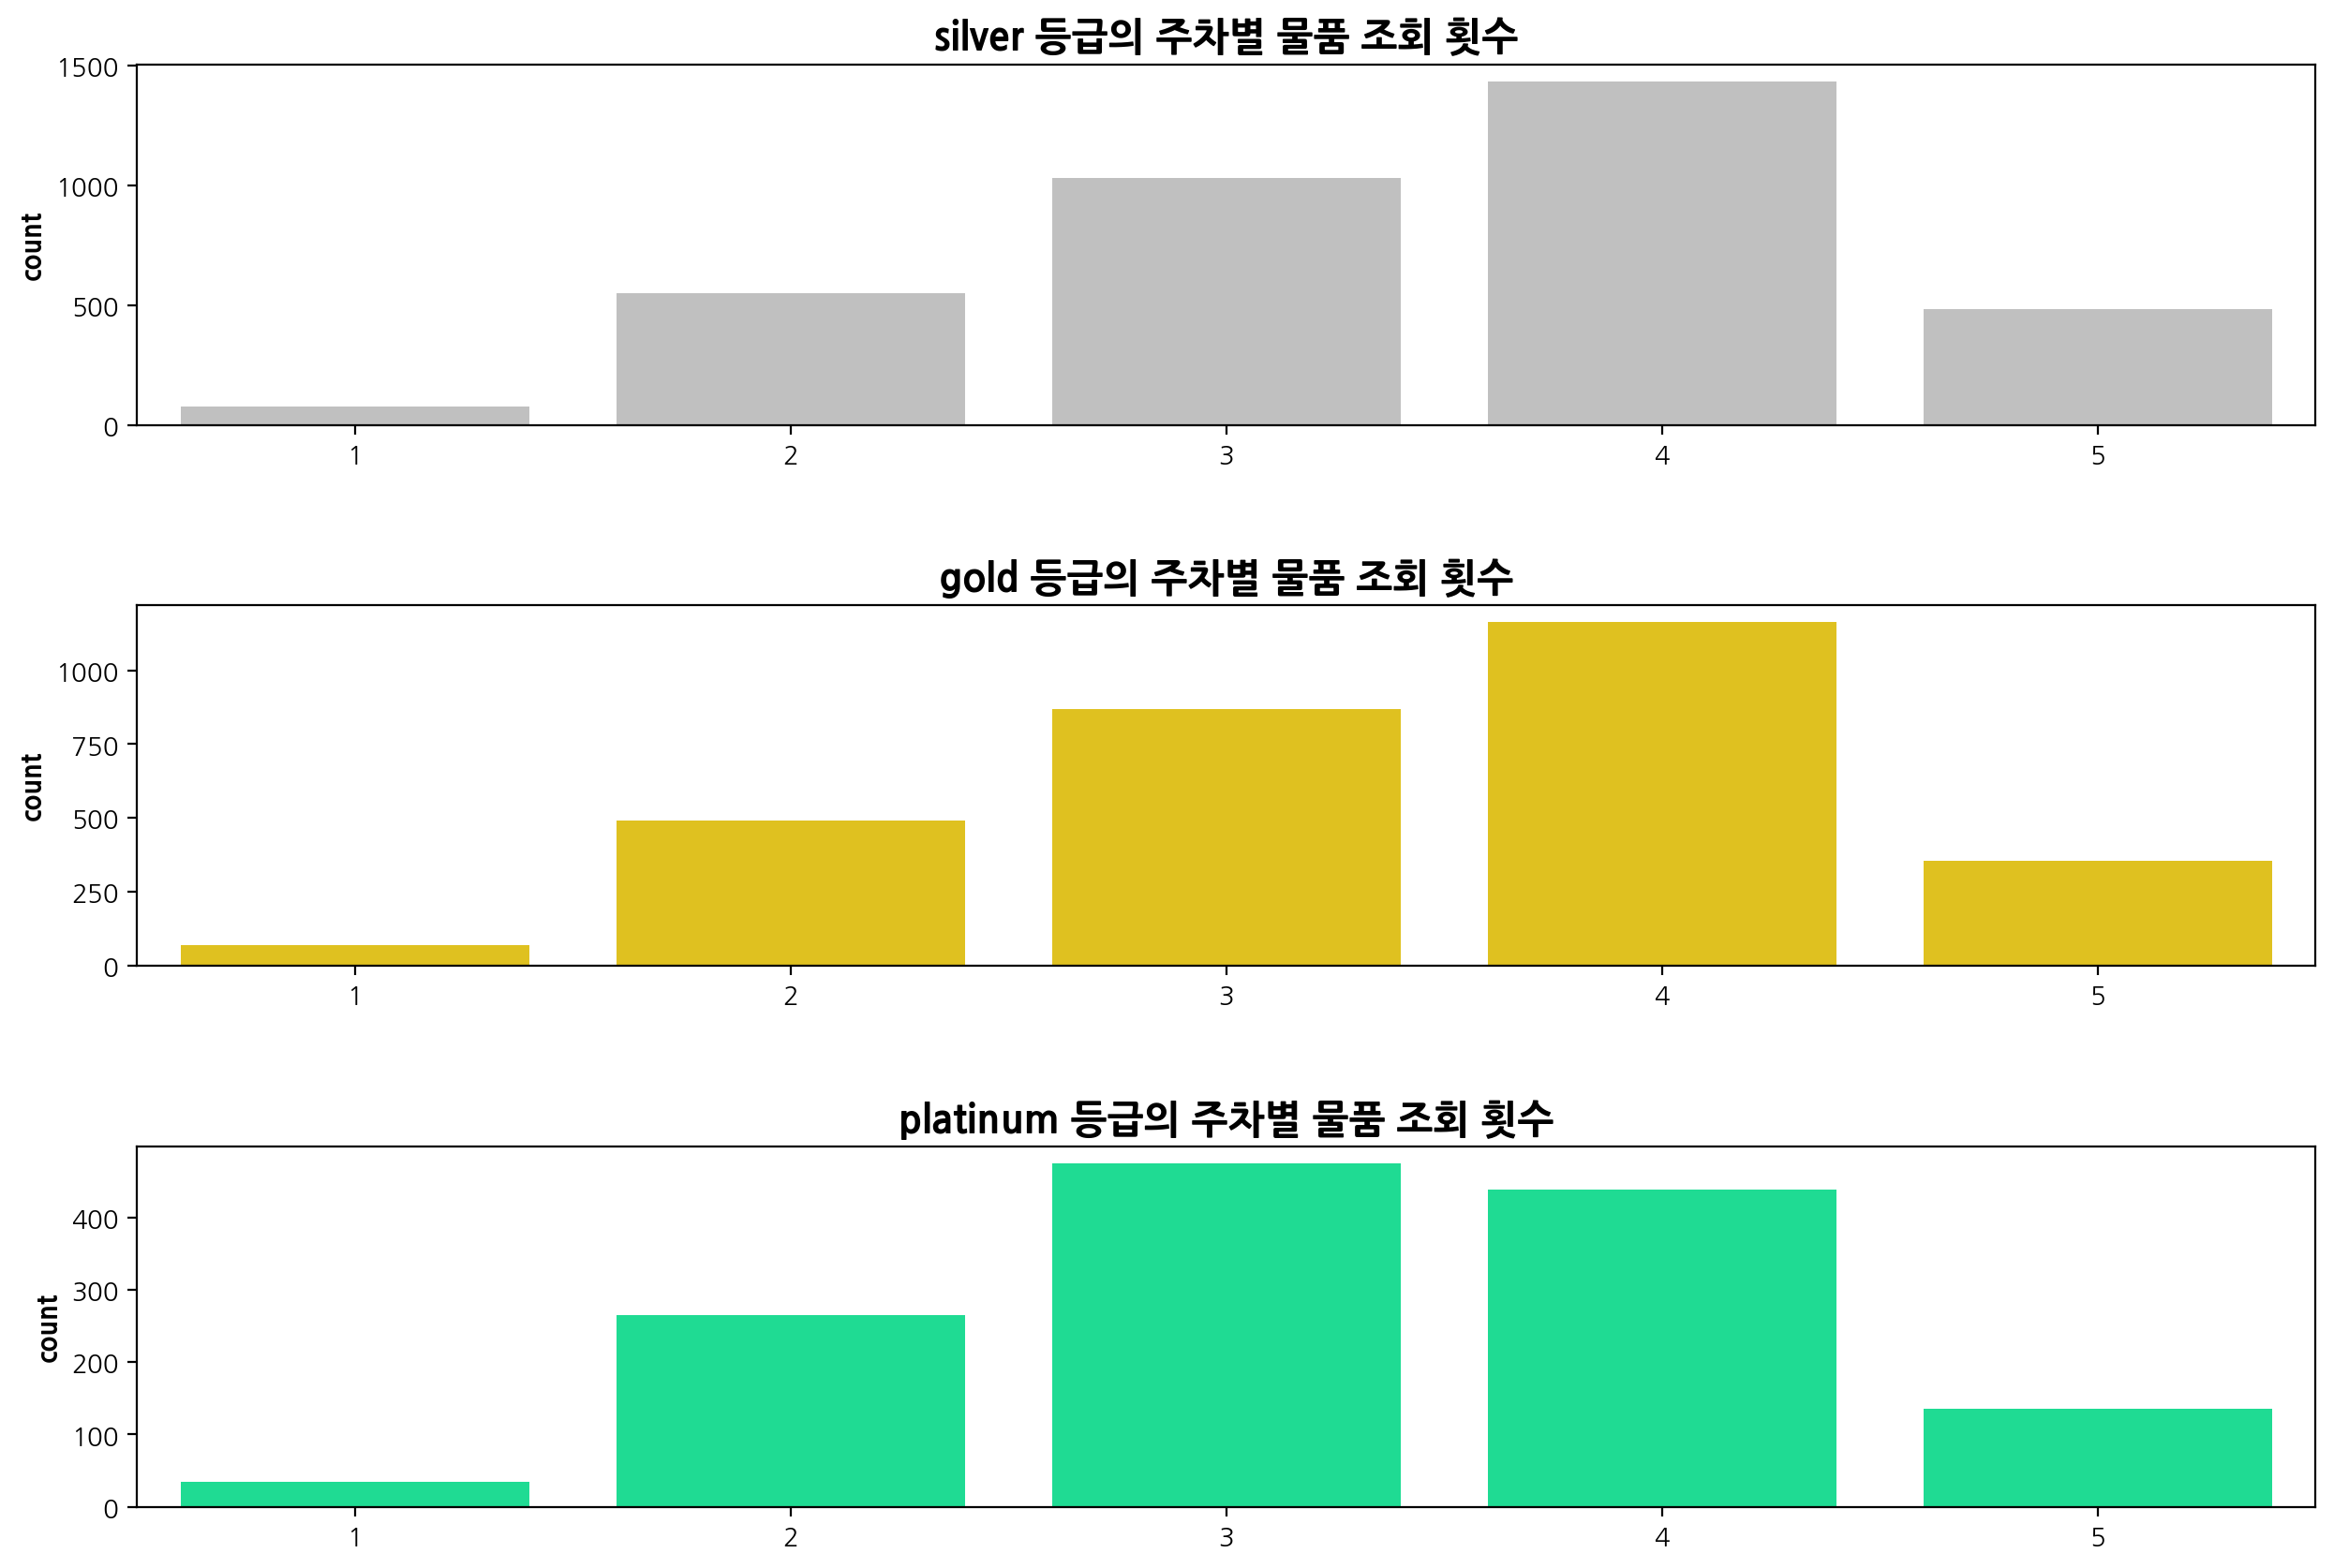

In [221]:
plt.figure(figsize = [15,10])

plt.subplots_adjust(hspace = 0.5)

cols = ['silver','gold','platinum']

i = 1

for _ in cols:
    
    graph_df = view_rfm[purchase_rfm['RFM_class'] == _].groupby('Weeks').agg({'RFM_class':'count'}).reset_index()
    
    plt.subplot(3,1,i)
    
    sns.barplot(data = graph_df,
                    x = 'Weeks',
                    y = 'RFM_class',
                    color = colors[i-1])
    
    
    i += 1 
    
    plt.title(f'{_} 등급의 주차별 물품 조회 횟수',weight = 'bold', size  =15)

    plt.ylabel('count',weight = 'bold')
    plt.xlabel('')

In [162]:
graph_df['Weeks'].unique()

array([1, 2, 3, 4], dtype=int64)

## 등급별 'purchase' 주차별

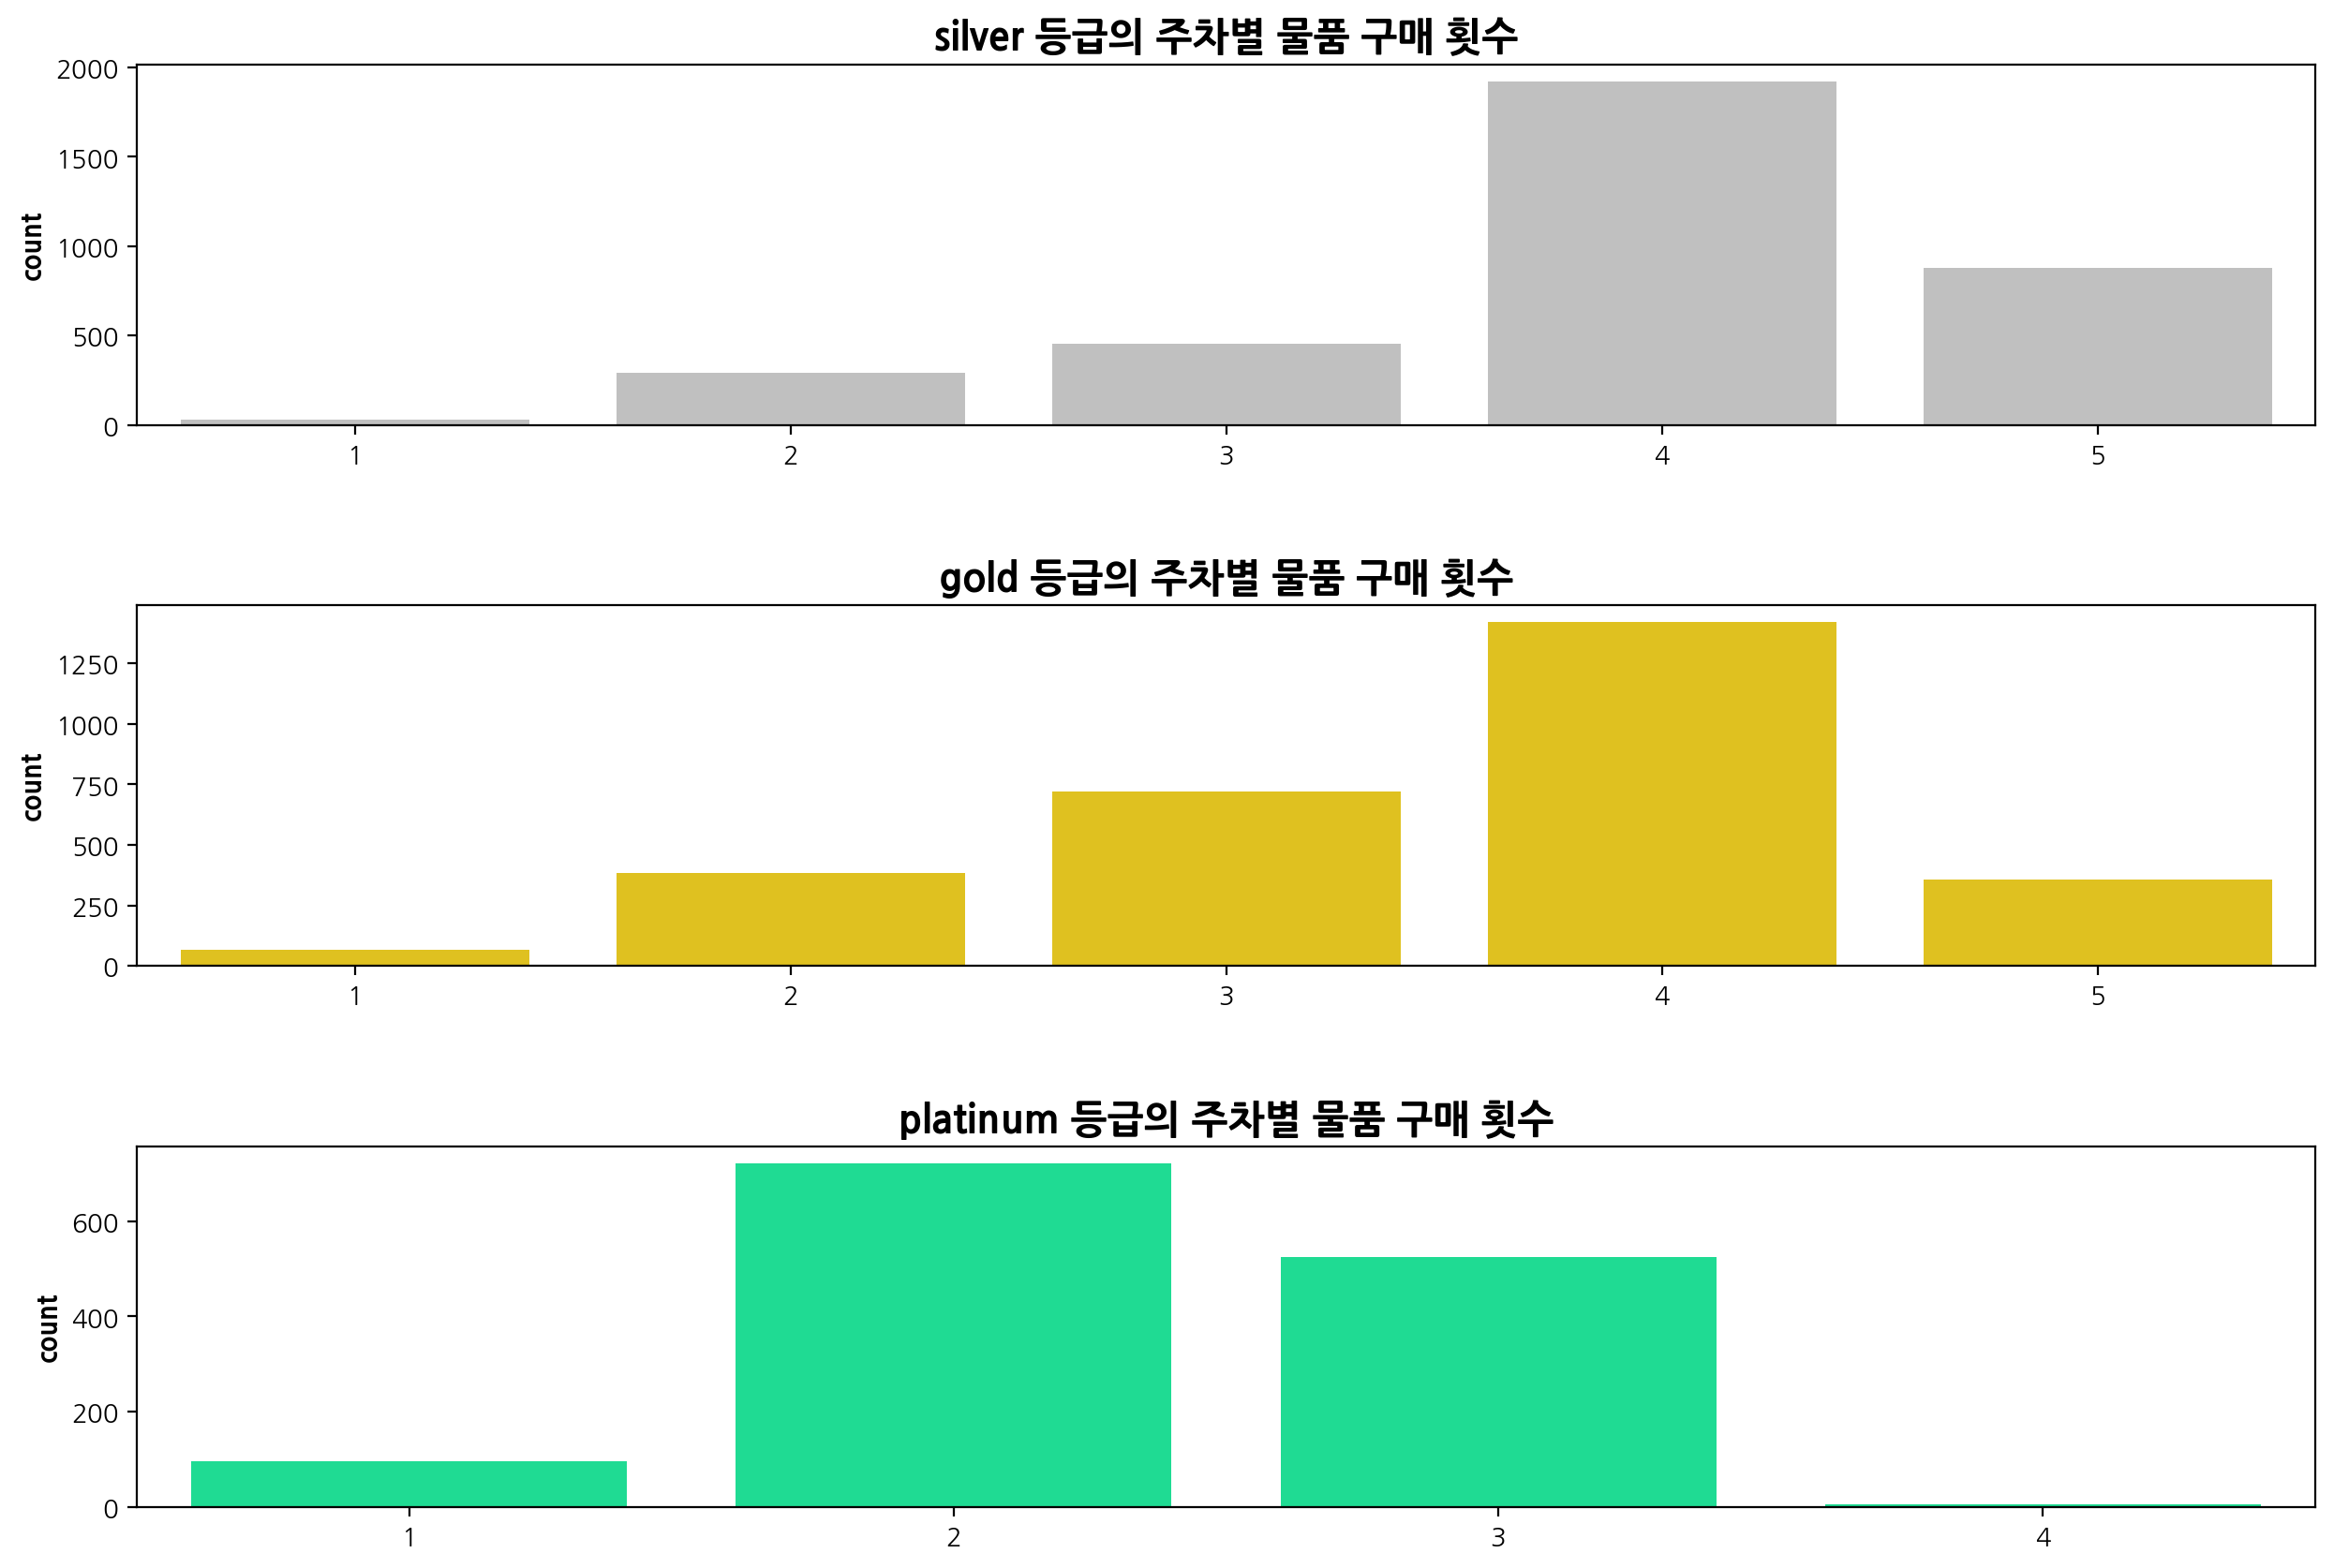

In [222]:
plt.figure(figsize = [15,10])

plt.subplots_adjust(hspace = 0.5)

cols = ['silver','gold','platinum']

i = 1

for _ in cols:
    
    graph_df = purchase_rfm[purchase_rfm['RFM_class'] == _].groupby('Weeks').agg({'RFM_class':'count'}).reset_index()
    
    plt.subplot(3,1,i)
    
    sns.barplot(data = graph_df,
                    x = 'Weeks',
                    y = 'RFM_class',
                    color = colors[i-1])
    
    
    i += 1 
    
    plt.title(f'{_} 등급의 주차별 물품 구매 횟수',weight = 'bold', size  =15)

    plt.ylabel('count',weight = 'bold')
    plt.xlabel('')